In [ ]:
import pandas as _hex_pandas
import datetime as _hex_datetime
import json as _hex_json

In [ ]:
hex_scheduled = _hex_json.loads("false")

In [ ]:
hex_user_email = _hex_json.loads("\"example-user@example.com\"")

In [ ]:
hex_user_attributes = _hex_json.loads("{}")

In [ ]:
hex_run_context = _hex_json.loads("\"logic\"")

In [ ]:
hex_timezone = _hex_json.loads("\"UTC\"")

In [ ]:
hex_project_id = _hex_json.loads("\"75647f72-f1db-49fd-bcd4-ebd4d6bd2f77\"")

In [ ]:
hex_project_name = _hex_json.loads("\"214B Project- Examining Gender Disparities in Pay and Leadership within the Business Sector\"")

In [ ]:
hex_status = _hex_json.loads("\"\"")

In [ ]:
hex_categories = _hex_json.loads("[]")

In [ ]:
hex_color_palette = _hex_json.loads("[\"#4C78A8\",\"#F58518\",\"#E45756\",\"#72B7B2\",\"#54A24B\",\"#EECA3B\",\"#B279A2\",\"#FF9DA6\",\"#9D755D\",\"#BAB0AC\"]")

By: Jerra McLaughlin, Chelsea Javier, & Chelsea Jimenez



In [ ]:
# Import necessary libraries 
import pandas as pd
import numpy as np
from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.regression.linear_model import WLS

# Read in data



In [ ]:
# import jinja2
# raw_query = """
#     select * from nscg_2021.csv
# """
# sql_query = jinja2.Template(raw_query).render(vars())

In [ ]:
# import jinja2
# raw_query = """
#     select
#         cast(salary as int) as salary, --capped at 9999996 - As of the week of February 1, 2021, what was your basic annual salary on your principal job, before deductions?
#         if (
#             cast(wkswk as int) = 98,
#             null,
#             cast(wkswk as int)
#         ) as wkswk, --Principal job salary: weeks per year basis; 98 is a logical skip
#         if (
#             cast(earn as int) = 9999998,
#             null,
#             cast(earn as int)
#         ) as earn, --capped at 9999996 Total earned income before deductions in previous year so need to also select those who worked last year
#         supwk,  --Supervised others in principal job indicator
#         wamgmt, --Work activity on principal job 10% indicator managing or supervising people/project
#         case
#             when
#                 cast(supdir as int) = 9998
#                 then null
#             else cast(supdir as int)
#         end as supdir,
#         case
#             when
#                 cast(supind as int) = 99998
#                 then null
#             else cast(supind as int)
#         end as supind,
#         case
#             when cast(emsmi as int) = 1
#                 then 'same_employer_same_job'
#             when cast(emsmi as int) = 2
#                 then 'same_employer_different_job'
#             when cast(emsmi as int) = 3
#                 then 'different_employer_same_job'
#             when cast(emsmi as int) = 4
#                 then 'different_employer_different_job'
#             else null
#         end as emsmi,  --During these two time periods - the week of February 1, 2019, and the week of February 1, 2021 were you working for?
#         if(
#             gender = 'F',
#             1,
#             0
#         )
#         as gender,
#         white,
#         case
#             when cast(racethm as int) = 1
#                 then 'asian'
#             when cast(racethm as int) = 2
#                 then 'american_indian_alaskan'
#             when cast(racethm as int) = 3
#                 then 'black'
#             when cast(racethm as int) = 4
#                 then 'hispanic'
#             when cast(racethm as int) = 5
#                 then 'white'
#             when cast(racethm as int) = 6
#                 then 'pacific_islander'
#             when cast(racethm as int) = 7
#                 then 'multiple_race_non_hispanic'
#             end as racethm,
#         case
#             when resploc = '01'
#                 then 'new_england'
#             when resploc = '02'
#                 then 'middle_atlantic'  
#             when resploc = '03'
#                 then 'east_north_central'
#             when resploc = '04'
#                 then 'west_north_central' 
#             when resploc = '05'
#                 then 'south_atlantic'
#             when resploc = '06'
#                 then 'east_south_central' 
#             when resploc = '07'
#                 then 'west_south_central'
#             when resploc = '08'
#                 then 'mountain'
#             when resploc = '09'
#                 then 'pacific_us_territories'
#             when resploc = '10'
#                 then 'europe'
#             when resploc = '20'
#                 then 'asia'
#             when resploc = '33'
#                 then 'caribbean'
#             when resploc = '37'
#                 then 'south_america'
#             when resploc = '40'
#                 then 'africa'
#             when resploc = '55'
#                 then 'abroad_unspecified'
#             end as resploc,
#         ctzusin, --us citizen
#         cast(refyr as int) as refyr, --year of survey
#         cast(biryr as int) as biryr, --birth year
#         agegr, --Age Group (5 year intervals)
#         cast(strtyr as int) as strtyr, --Year principal job started
#         prmbr, --Number of professional society memberships
#         promtgi, -- attended prof meetings
#         wktrni, -- attended trainings
#         if (cast(hrswk as int) = 98,
#             null,
#             hrswk) as hrswk, --capped at 96 hours a week
#         case
#             when cast(n2ocprbg as int) = 1
#                 then 'S&E'
#             when cast(n2ocprbg as int) = 2
#                 then 'S&E_related'
#             when cast(n2ocprbg as int) = 3
#                 then 'non_S&E'
#             else null
#             end as n2ocprbg, --Job code for principal job broad group SE based
#         case
#             when cast(n2ocprmg as int) = 1
#                 then 'computer_scientists'
#             when cast(n2ocprmg as int) = 2
#                 then 'bio_life_scientists'
#             when cast(n2ocprmg as int) = 3
#                 then 'physical_scientists_related'
#             when cast(n2ocprmg as int) = 4
#                 then 'social_scientists_related'
#             when cast(n2ocprmg as int) = 5
#                 then 'engineers'
#             when cast(n2ocprmg as int) = 6
#                 then 'S&E_related_occupations'
#             when cast(n2ocprmg as int) = 7
#                 then 'non-S&E_occupations'
#             else null
#             end as occupation_group,
#         n3ocpr, --Job code for principal job best code, includes Top-level managers, execs, admins (711410) and OTHER mid-level managers (711470)
#         case when 
#             n3ocpr in (621420, 621430,621440, 621450, 711460, 711470) 
#                 then 'mid_level_manager'
#             when n3ocpr = 711410
#                 then 'c_suite_manager'
#             when n3ocpr = 721520
#                 then 'personnel_mgmt'
#             when n3ocpr = 721510
#                 then 'financial_mgmt'
#             when n3ocpr = 721530
#                 then 'other_management_occupations'
#             else null
#             end as leadership_job_codes,
#         case when 
#             n3ocpr = 621420
#                 then 'computer_it_managers'
#             when n3ocpr = 621430
#                 then 'eng_managers'
#             when n3ocpr = 621440
#                 then 'medical_health_manager'
#             when n3ocpr = 621450
#                 then 'natural_science_manager'
#             when n3ocpr = 711460
#                 then 'ed_administrators'
#             when n3ocpr = 711470
#                 then 'other_mid_level_manager'
#             when n3ocpr = 711410
#                 then 'c_suite_manager'
#             when n3ocpr = 721520
#                 then 'personnel_mgmt'
#             when n3ocpr = 721510
#                 then 'financial_mgmt'
#             when n3ocpr = 721530
#                 then 'other_management_occupations'
#             else null
#             end as leadership_job_titles,
#         case 
#             when cast(n3ocprng as int) = 11 then 'computer_information_scientists' 
#             when cast(n3ocprng as int) = 12 then 'mathematical_scientists'
#             when cast(n3ocprng as int) = 18 then 'postsecondary teachers_computer_and_math'
#             when cast(n3ocprng as int) = 21 then 'agricultural_food_scientists'
#             when cast(n3ocprng as int) = 22 then 'biological_medical_scientists' 
#             when cast(n3ocprng as int) = 23 then 'environmental_life_scientists'
#             when cast(n3ocprng as int) = 28 then 'postsecondary_teachers_life_related_sciences'
#             when cast(n3ocprng as int) = 31 then 'chemists_except_biochemists'
#             when cast(n3ocprng as int) = 32 then 'earth_atmospheric_ocean_scientists'
#             when cast(n3ocprng as int) = 33 then 'physicists'
#             when cast(n3ocprng as int) = 34 then 'other_physical_related_scientists'
#             when cast(n3ocprng as int) = 38 then 'postsecondary_teachers_physical_and_related_sciences'
#             when cast(n3ocprng as int) = 41 then 'economists'
#             when cast(n3ocprng as int) = 42 then 'political_scientists'
#             when cast(n3ocprng as int) = 43 then 'psychologists'
#             when cast(n3ocprng as int) = 44 then 'anthropologists'
#             when cast(n3ocprng as int) = 45 then 'other_social_related_scientists'
#             when cast(n3ocprng as int) = 48 then 'postsecondary_teachers_social_related_sciences'
#             when cast(n3ocprng as int) = 51 then 'aerospace_aeronautical_astronautical_engineers'
#             when cast(n3ocprng as int) = 52 then 'chemical_engineers'
#             when cast(n3ocprng as int) = 53 then 'civil_architectural_sanitary_engineers'
#             when cast(n3ocprng as int) = 54 then 'electrical_computer_hardware_engineers'
#             when cast(n3ocprng as int) = 55 then 'industrial_engineers'
#             when cast(n3ocprng as int) = 56 then 'mechanical_engineers'
#             when cast(n3ocprng as int) = 57 then 'other_engineers'
#             when cast(n3ocprng as int) = 58 then 'postsecondary_teachers_engineering'
#             when cast(n3ocprng as int) = 61 then 'health_related_occupations'
#             when cast(n3ocprng as int) = 62 then 'S&E_managers'
#             when cast(n3ocprng as int) = 63 then 'S&E_pre_college_teachers'
#             when cast(n3ocprng as int) = 64 then 'S&E_technicians_and_technologists'
#             when cast(n3ocprng as int) = 65 then 'other_S&E_related_occupations'
#             when cast(n3ocprng as int) = 71 then 'non_S&E_managers'
#             when cast(n3ocprng as int) = 72 then 'management_related_occupations' 
#             when cast(n3ocprng as int) = 73 then 'non_S&E_precollege_teachers'
#             when cast(n3ocprng as int) = 74 then 'non_S&E_postsecondary_teachers' 
#             when cast(n3ocprng as int) = 75 then 'social_services_related_occupations' 
#             when cast(n3ocprng as int) = 76 then 'sales_marketing_occupations' 
#             when cast(n3ocprng as int) = 77 then 'art_humanities_related_occupations' 
#             when cast(n3ocprng as int) = 78 then 'other_non_S&E_occupations' 
#             else null
#             end as principal_job,
#         case
#             when wapri = '01'
#             then 'accounting_finance_contracts'
#             when wapri = '02'
#             then 'basic_research'
#             when wapri = '03'
#             then 'applied_research'
#             when wapri = '04'
#             then 'reasearch_dev_materials_devices'
#             when wapri = '05'
#             then 'design_equipment_processes_structures_models'
#             when wapri = '06'
#             then 'computer_apps_programming_systems_dev'
#             when wapri = '07'
#             then 'human_resources'
#             when wapri = '08'
#             then 'managing_supervising_people_projects'
#             when wapri = '09'
#             then 'production_operations_maintenance'
#             when wapri = '10'
#             then 'professional_services'
#             when wapri = '11'
#             then 'sales_purchasing_marketing'
#             when wapri = '12'
#             then 'quality_productivity_management'
#             when wapri = '13'
#             then 'teaching'
#             when wapri = '14'
#             then 'other_work_activity'
#             else null
#             end as wapri,  --Work activity spent most hours on in principal job - like dept
#         wasec,  --Work activity spent second most hours on in principal job
#         newbus, --within 5 years founded
#         case
#             when cast(nedtp as int) = 1 then 'self_employed_not_incorp'
#             when cast(nedtp as int) = 2 then 'self_employed_incorp'
#             when cast(nedtp as int) = 3 then 'private_for_profit_org'
#             when cast(nedtp as int) = 4 then 'private_not_for_profit_org'
#             when cast(nedtp as int) = 5 then 'local_government'
#             when cast(nedtp as int) = 6 then 'state_government'
#             when cast(nedtp as int) = 7 then 'military'
#             when cast(nedtp as int) = 8 then 'federal_government'
#             when cast(nedtp as int) = 9 then 'other_employer_type'
#         else null
#         end as employer_type,
#         case
#             when cast(emsecsm as int) = 1 then 'educational_institutution'
#             when cast(emsecsm as int) = 2 then 'government'
#             when cast(emsecsm as int) = 3 then 'business'
#         else null
#         end as sector, -- Employer sector --1: Educational Institution 2: Government 3: Business/Industry
#         case when 
#             emsize = 1
#             then '10_or_fewer_employees'
#         when emsize = 2
#             then '11_to_24_employees'
#         when emsize = 3
#             then '25_to_99_employees'
#         when emsize = 4
#             then '100_to_499_employees'
#         when emsize = 5
#             then '500_to_999_employees'
#         when emsize = 6
#             then '1000_to_4999_employees'
#         when emsize = 7
#             then '5000_to_24999_employees'
#         when emsize = 8
#             then '25000+_employees'
#         else null
#         end as emsize,
#         case 
#         when emsize = 1
#             then 10
#         when emsize = 2
#             then round(11 + (24-11)/2)
#         when emsize = 3
#             then round(25 + (99-25)/2)
#         when emsize = 4
#             then round(100 + (499-100)/2)
#         when emsize = 5
#             then round(500 + (999-500)/2)
#         when emsize = 6
#             then round(1000 + (4999-1000)/2)
#         when emsize = 7
#             then round(5000 + (24999-5000)/2)
#         when emsize = 8
#             then 25000
#         else null
#         end as emsize_midpoint,
#         case
#             when emrg = '01'
#                 then 'new_england'
#             when emrg = '02'
#                 then 'middle_atlantic'  
#             when emrg = '03'
#                 then 'east_north_central'
#             when emrg = '04'
#                 then 'west_north_central' 
#             when emrg = '05'
#                 then 'south_atlantic'
#             when emrg = '06'
#                 then 'east_south_central' 
#             when emrg = '07'
#                 then 'west_south_central'
#             when emrg = '08'
#                 then 'mountain'
#             when emrg = '09'
#                 then 'pacific_us_territories'
#             when emrg = '10'
#                 then 'europe'
#             when emrg = '20'
#                 then 'asia'
#             when emrg = '33'
#                 then 'caribbean'
#             when emrg = '37'
#                 then 'south_america'
#             when emrg = '40'
#                 then 'africa'
#             else null 
#             end as emrg,
#         case when
#             emst = '085' then 'new_england'
#             when emst = '086' then 'mid_atlantic'
#             when emst = '087' then 'east_north_central'
#             when emst = '088' then 'west_north_central'
#             when emst = '089' then 'south_atlantic'
#             when emst = '090' then 'east_south_central'
#             when emst = '091' then 'west_south_central'
#             when emst = '092' then 'mountain'
#             when emst = '093' then 'pacific_region'
#             when emst = '096' then 'not_specified'
#             else null
#         end as emst,
#         case
#             when cast(jobsatis as int) = 1
#                 then 'very_satisfied'
#             when cast(jobsatis as int) = 2
#                 then 'somewhat_satisfied'
#             when cast(jobsatis as int) = 3
#                 then 'somewhat_dissatisfied'
#             when cast(jobsatis as int) = 4
#                 then 'very_dissatisfied'
#             end as jobsatis,
#         case
#             when
#                 cast(wkslyr as int) = 98 --logical skip
#                 then 52 
#             else cast(wkslyr as int)
#         end as wkslyr, --Number of weeks worked per year if less than 52 weeks
#         cast(refyr as int) - cast(strtyr as int) as years_at_job,
#         case
#             when
#                 wksyr = 1 --Was this salary based on a 52-week year, or less than that? 1 = worked 52 weeks per year
#                 then 1
#             else 0
#         end as fiftytwo_wksyr,
#         cast(refyr as int) - cast(dgryr as int) as years_since_highest_degree,
#         cast(refyr as int) - cast(mryr as int) as years_since_most_recent_degree,
#         cast(refyr as int) - cast(bayr as int) as years_since_first_ba,
#         cast(bsdgn as int) as bsdgn, --Number of bachelor's or higher degrees
#         cast(bayr as int) as bayr,
#         baind, --Indicator of whether respondent received a BA-level degree
#         hdcarn,
#         n2dgrmed, -- Field of study for highest degree - best code
#         ndgmebg, --Field of study for highest degree broad group - SE based
#         case 
#         when n2dgrmed like '116%'
#             then 'computer_and_info_sciences'
#         when n2dgrmed like '128%'
#             then 'math'
#         when n2dgrmed like '216%'
#             then 'agricultural_sciences'    
#         when n2dgrmed like '226%'
#             then 'biological_sciences'
#         when n2dgrmed like '236%'
#             then 'environmental_sciences'
#         when n2dgrmed like '318%'
#             then 'chemistry'
#         when n2dgrmed like '328%'
#             then 'geological_sciences'
#         when n2dgrmed like '338%'
#             then 'physics'
#         when n2dgrmed like '348%'
#             then 'other_physical_sciences'
#         when n2dgrmed like '416%'
#             then 'ag_economics'
#         when n2dgrmed like '419%'
#             then 'economics'
#         when n2dgrmed like '429%'
#             then 'political_sciences'
#         when n2dgrmed like '437%'
#             then 'ed_psycholology'
#         when n2dgrmed like '438%'
#             then 'psycholology'
#         when n2dgrmed like '449%'
#             then 'sociology_anthropology'
#         when n2dgrmed like '456%'
#             then 'ethnic_studies'
#         when n2dgrmed like '457%'
#             then 'linguistics'
#         when n2dgrmed like '458%'
#             then 'philosophy'
#         when n2dgrmed like '459%'
#             then 'geography'
#         when n2dgrmed like '517%'
#             then 'aerospace_eng'
#         when n2dgrmed like '527%'
#             then 'chem_eng'
#         when n2dgrmed like '537%'
#             then 'civil_arch_eng'
#         when n2dgrmed like '547%'
#             then 'computer_eng'
#         when n2dgrmed like '557%'
#             then 'industrial_eng'
#         when n2dgrmed like '567%'
#             then 'mechanical_eng'
#         when n2dgrmed like '577%'
#             then 'bio_eng'
#         when n2dgrmed like '617%'
#             then 'health_medical_sciences'
#         when n2dgrmed like '627%'
#             then 'specialized_teacher_education'
#         when n2dgrmed like '636%'
#             then 'computer_programming'
#         when n2dgrmed like '637%'
#             then 'other_eng'
#         when n2dgrmed like '6461%'
#             then 'architects'
#         when n2dgrmed like '6465%'
#             then 'acutuaries'
#         when n2dgrmed like '716%'
#             then 'business_management'
#         when n2dgrmed like '727%'
#             then 'education'
#         when n2dgrmed like '738%'
#             then 'theology'
#         when n2dgrmed like '739%'
#             then 'social_work'
#         when n2dgrmed like '746%'
#             then 'marketing'
#         when n2dgrmed like '757%'
#             then 'literature_language'
#         when n2dgrmed like '758%'
#             then 'liberal_arts'
#         when n2dgrmed like '7592%'
#             then 'history'
#         when n2dgrmed like '7594%'
#             then 'arts'
#         when n2dgrmed like '7666%'
#             then 'journalism_communications'
#         when n2dgrmed like '7666%'
#             then 'journalism_communications'
#         when n2dgrmed like '7668%'
#             then 'conservation'
#         when n2dgrmed like '7669%'
#             then 'criminal_justice'
#         when n2dgrmed like '7680%'
#             then 'home_econ'
#         when n2dgrmed like '7681%'
#             then 'law'
#         when n2dgrmed like '7683%'
#             then 'library_science'        
#         when n2dgrmed like '7685%'
#             then 'parks_and_rec'
#         when n2dgrmed like '7690%'
#             then 'public_admin'
#         when n2dgrmed = '769950'
#             then 'other'
#         else null
#         end as highest_degree_field,
#         case
#             when cast(ndgmemg as int) = 1
#                 then 'computer_math_sciences'
#             when cast(ndgmemg as int) = 2
#                 then 'life_sciences'
#             when cast(ndgmemg as int) = 3
#                 then 'physical_related_sciences'
#             when cast(ndgmemg as int) = 4
#                 then 'social_related_sciences'
#             when cast(ndgmemg as int) = 5
#                 then 'engineering'
#             when cast(ndgmemg as int) = 6
#                 then 'S&E_related_fields'
#             when cast(ndgmemg as int) = 7
#                 then 'non_S&E_fields'
#             end as highest_general_degree_field,
#         ndgmeng, -- Field of study for highest degree minor group
#         case
#             when
#                 dgrdg = 1
#                 then 'Bachelors'
#             when
#                 dgrdg = 2
#                 then 'Masters'
#             when
#                 dgrdg = 3
#                 then 'Doctorate'
#             when
#                 dgrdg = 4
#                 then 'Professional'
#         end as highest_degree_type,
#         spnat, --Technical expertise required by spouse/partner job: engineering, computer, math, natural sciences
#         spot, --Technical expertise required by spouse/partner job: other
#         spsoc, --Technical expertise required by spouse/partner Job: social sciences
#         case 
#             when spowk = 1
#                 then 'full_time'
#             when spowk = 2   
#                 then 'part_time'
#             when spowk = 3   
#                 then 'non_working'   
#             else 'not_partnered' 
#         end as partner_work,
#         marind,
#         case 
#             when cast(marsta as int) = 1
#                 then 'married'
#             when cast(marsta as int) = 2
#                 then 'living_with_partner'
#             when cast(marsta as int) = 3
#                 then 'widowed'
#             when cast(marsta as int) = 4
#                 then 'separated'
#             when cast(marsta as int) = 5
#                 then 'divorced'
#             when cast(marsta as int) = 6
#                 then 'never_married'
#         end as marsta,
#         chlvin, --Children living in household indicator (all ages)
#         CASE 
#             WHEN (CAST(marsta AS int) = 1 OR CAST(marsta AS int) = 2) AND chlvin = 1 THEN 1
#             ELSE 0
#         END AS partnered_with_children,
#         ch6in,
#         chun12, 
#         case
#             when
#                 cast(chu2 as int) = 98
#                 then null
#             else cast(chu2 as int)
#         end as chu2,
#         case
#             when
#                 cast(ch25 as int) = 98
#                 then null
#             else cast(ch25 as int)
#         end as ch25,
#         case
#             when
#                 cast(ch6 as int) = 98
#                 then null
#             else cast(ch6 as int)
#         end as ch6,
#         case
#             when
#                 cast(ch611 as int) = 98
#                 then null
#             else cast(ch611 as int)
#         end as ch611,
#         case
#             when
#                 cast(ch1218 as int) = 98
#                 then null
#             else cast(ch1218 as int)
#         end as ch1218,
#         case
#             when
#                 cast(ch19 as int) = 98
#                 then null
#             else cast(ch19 as int)
#         end as ch19,
#         lfstat,
#         resplcus
#     from df
#     where df.lfstat = 1 --employed workforce
#     and df.resplcus = 1 --respondents in US
#     and baind = 1 --Indicator of whether respondent received a BA-level degree
#     and agegr < 67 -- retirement age
#     and salary > 15080 --minimum wage in dollars per year for full-time workers
#     and earn > 15080
#     --and employer_type = 'private_for_profit_org'
#     and hrswk >=30 -- full time workers
#     and fiftytwo_wksyr = 1 --salary based on 52 weeks worked last year
#     and employer_type not in 
#         (
#         'military',
#         'other_employer_type',
#         'self_employed_not_incorp',
#         'self_employed_incorp'
#         )
# """
# sql_query = jinja2.Template(raw_query).render(vars())

# Create new variables



In [ ]:
data.loc[(data['employer_type'] == 'private_for_profit_org') & (data['sector'] == 'business'), 'private_corp'] = 1
data.loc[data['private_corp'].isnull(), 'private_corp'] = 0
data['private_corp'].describe()

count    58207.000000
mean         0.606319
std          0.488570
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: private_corp, dtype: float64

In [ ]:
# Measures of workplace authority 
data.loc[(data['n3ocpr'] == 711410), 'c_suite_managers'] = 1
data.loc[data['c_suite_managers'].isnull(), 'c_suite_managers'] = 0
data['c_suite_managers'].describe()

count    58207.000000
mean         0.032402
std          0.177066
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: c_suite_managers, dtype: float64

In [ ]:
data['span_of_control'] = round((data['supdir'] + data['supind']))
data['span_of_control'].describe()

count    23634.000000
mean        28.399594
std        188.771402
min          1.000000
25%          3.000000
50%          6.000000
75%         15.000000
max      10026.000000
Name: span_of_control, dtype: float64

In [ ]:
 # Define the leadership roles based on specific job codes
leadership_roles = ['mid_level_manager', 'c_suite_manager' 'personnel_mgmt', 'financial_mgmt', 'other_management_occupations']

# Create a binary column 'is_leadership' that marks leadership positions
data['is_leadership'] = data['leadership_job_codes'].isin(leadership_roles).astype(int)

# Filter data to include only individuals in leadership roles
leadership_data = data[data['is_leadership'] == 1]

# Group by race and gender
leadership_counts = leadership_data.groupby(['gender']).size().reset_index(name='leadership_count')

# Get the total counts for each race gender group in the full dataset
total_counts = data.groupby(['gender']).size().reset_index(name='total_count')

# Merge the leadership counts with the total counts
leadership_representation = pd.merge(leadership_counts, total_counts, on=['gender'])

# Display DataFrame
leadership_representation

,gender,leadership_count,total_count
0,0,6221,34320
1,1,4848,23887


Men



In [ ]:
data.loc[(data['leadership_job_codes'].notnull()), 'leadership_roles'] = 1
data.loc[data['leadership_roles'].isnull(), 'leadership_roles'] = 0
data['leadership_roles'].describe()

count    58207.000000
mean         0.236432
std          0.424894
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: leadership_roles, dtype: float64

In [ ]:
# Upload codebook 
codebook = pd.read_excel("Dpcg21.xlsx")

/home/hexuser/.cache/pypoetry/virtualenvs/python-kernel-OtKFaj5M-py3.9/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
# import jinja2
# raw_query = """
#     select * from codebook
# """
# sql_query = jinja2.Template(raw_query).render(vars())

# Descriptive Statistics



In [ ]:
# Describe data 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
salary,58207.0,103214.625268,65589.505655,15360.0,64000.0,90000.0,126000.0,749852.0
wkswk,58207.0,52.000000,0.000000,52.0,52.0,52.0,52.0,52.0
earn,58143.0,113402.896135,114110.296954,15170.0,62000.0,90000.0,130000.0,1390630.0
supwk,58207.0,0.406034,0.491095,0.0,0.0,0.0,1.0,1.0
wamgmt,58207.0,0.612349,0.487218,0.0,0.0,1.0,1.0,1.0
supdir,23634.0,6.477236,15.544736,1.0,2.0,4.0,7.0,996.0
supind,23634.0,21.922358,187.063279,0.0,0.0,0.0,7.0,9996.0
gender,58207.0,0.410380,0.491907,0.0,0.0,0.0,1.0,1.0
ctzusin,58207.0,0.899290,0.300946,0.0,1.0,1.0,1.0,1.0
refyr,58207.0,2021.000000,0.000000,2021.0,2021.0,2021.0,2021.0,2021.0


In [ ]:
# Look at columns in the dataset 
data.columns

Index(['salary', 'wkswk', 'earn', 'supwk', 'wamgmt', 'supdir', 'supind',
       'emsmi', 'gender', 'white', 'racethm', 'resploc', 'ctzusin', 'refyr',
       'biryr', 'agegr', 'strtyr', 'prmbr', 'promtgi', 'wktrni', 'hrswk',
       'n2ocprbg', 'occupation_group', 'n3ocpr', 'leadership_job_codes',
       'leadership_job_titles', 'principal_job', 'wapri', 'wasec', 'newbus',
       'employer_type', 'sector', 'emsize', 'emsize_midpoint', 'emrg', 'emst',
       'jobsatis', 'wkslyr', 'years_at_job', 'fiftytwo_wksyr',
       'years_since_highest_degree', 'years_since_most_recent_degree',
       'years_since_first_ba', 'bsdgn', 'bayr', 'baind', 'hdcarn', 'n2dgrmed',
       'ndgmebg', 'highest_degree_field', 'highest_general_degree_field',
       'ndgmeng', 'highest_degree_type', 'spnat', 'spot', 'spsoc',
       'partner_work', 'marind', 'marsta', 'chlvin', 'partnered_with_children',
       'ch6in', 'chun12', 'chu2', 'ch25', 'ch6', 'ch611', 'ch1218', 'ch19',
       'lfstat', 'resplcus', 'private

In [ ]:
# Display first few rows of DataFrame 
data.head()

,salary,wkswk,earn,supwk,wamgmt,supdir,supind,emsmi,gender,white,...,ch611,ch1218,ch19,lfstat,resplcus,private_corp,c_suite_managers,span_of_control,is_leadership,leadership_roles
0,60000,52,43000.0,0.0,1.0,NaN,NaN,same_employer_different_job,1,0,...,0.0,1.0,0.0,1,1,0.0,0.0,NaN,1,1.0
1,60000,52,60000.0,0.0,1.0,NaN,NaN,same_employer_same_job,1,0,...,0.0,0.0,0.0,1,1,0.0,0.0,NaN,1,1.0
2,90000,52,90000.0,0.0,0.0,NaN,NaN,same_employer_same_job,0,0,...,0.0,0.0,2.0,1,1,1.0,0.0,NaN,0,0.0
3,80000,52,80000.0,0.0,0.0,NaN,NaN,same_employer_same_job,1,1,...,0.0,0.0,1.0,1,1,0.0,0.0,NaN,0,0.0
4,80000,52,80000.0,0.0,0.0,NaN,NaN,same_employer_same_job,1,1,...,NaN,NaN,NaN,1,1,0.0,0.0,NaN,0,0.0


In [ ]:
# Check data information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58207 entries, 0 to 58206
Data columns (total 76 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   salary                          58207 non-null  int32  
 1   wkswk                           58207 non-null  int32  
 2   earn                            58143 non-null  float64
 3   supwk                           58207 non-null  float64
 4   wamgmt                          58207 non-null  float64
 5   supdir                          23634 non-null  float64
 6   supind                          23634 non-null  float64
 7   emsmi                           55915 non-null  object 
 8   gender                          58207 non-null  int32  
 9   white                           58207 non-null  object 
 10  racethm                         58207 non-null  object 
 11  resploc                         58207 non-null  object 
 12  ctzusin                         

# Clean the dataset 



In [ ]:
# Drop columns with more than 50% missing values
threshold = 0.5 * len(data)
data = data.dropna(thresh=threshold, axis=1).copy()

# Fill missing values in numerical columns with the median
numerical_cols = data.select_dtypes(include=['float64', 'int32', 'int64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

# Fill missing values in categorical columns with 'Unknown'
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna('Unknown')

In [ ]:
# Remove duplicates
dropped_data = data.drop_duplicates()

In [ ]:
# Verify data was cleaned 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58207 entries, 0 to 58206
Data columns (total 63 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   salary                          58207 non-null  int32  
 1   wkswk                           58207 non-null  int32  
 2   earn                            58207 non-null  float64
 3   supwk                           58207 non-null  float64
 4   wamgmt                          58207 non-null  float64
 5   emsmi                           58207 non-null  object 
 6   gender                          58207 non-null  int32  
 7   white                           58207 non-null  object 
 8   racethm                         58207 non-null  object 
 9   resploc                         58207 non-null  object 
 10  ctzusin                         58207 non-null  int64  
 11  refyr                           58207 non-null  int32  
 12  biryr                           

### Who will we include in our data analysis?

This project investigates how women's salaries within the business sector compare to men's and how their representation in leadership positions differs from that of men. If women earn less within leadership positions, what factors contribute to this? 

 Questions we aim to explore:

- Do men earn more than women within the business sector?
- Within the business sector, is there a wage gap between women and men in leadership roles and is there a difference in leadership representation? 
- If women earn less than men, what factors contribute to this? 

### Variables: 

- highest_degree_type - highest degree 
- salary - salary 
- gender - gender 
- sector - business sector 
- occupation_group- occupation 
- leadership- leadership role 

### **Purpose of study**:

The purpose of this study is to examine gender disparities in salaries and leadership representation within the business sector. By analyzing the wage gap between men and women, particularly in leadership roles, and assessing the factors that influence women's underrepresentation in leadership, this study aims to provide insights into potential barriers to gender equity in the workplace.

### **Why these variables**:

- Gender
  - Gender is central to this analysis as it plays a significant role in shaping opportunities, pay, and representation in various occupational fields
- Salary 
  - Salary is a powerful indicator of gender and racial inequality, highlighting systemic biases that often undervalue women’s labor. Analyzing salary differences by gender allows us to quantify how these factors affect financial compensation for similar work and reveal gaps in earnings between men and women 
- Occupation 
  - Occupation is a crucial variable because it reflects the roles, responsibilities, and industries individuals work in, which often have distinct gender and racial disparities. Certain occupations are more segregated by gender or race, with women and people of color often concentrated in lower-paying fields or roles. By examining occupation, we can uncover patterns of occupational segregation, which is a key driver of wage disparities
- Leadership role 
  - Leadership roles are critical to analyze because they represent positions of influence and higher earning potential. By including leadership roles, this study investigates how gender influences access to leadership positions and whether being in a leadership role continues to show salary disparities 
- Highest degree type 
  - Educational attainment is often tied to a higher salary. However, gender-based pay gaps often persist even among similarly educated individuals. Investigating the highest degree type clarifies whether pay gaps are due to educational differences or remain despite similar qualifications. This enhances our understanding of gender inequality and helps identify where women encounter barriers, even with comparable educational backgrounds
- Business sector
  - Out of all sectors (education, business, and government), women are least represented within the business sector. This study focuses on the business sector because of its economic importance, the significant gender disparities in pay, and the underrepresentation of women

### **Hypotheses:** 

- H0: Women ,_do not_, have ,_significantly_, lower salaries than men within the business sector
- H1: Women have ,_significantly _,lower salaries than men within the business sector 



- H0: Women in the business sector who hold leadership positions ,_do not_, have ,_significantly_, lower salaries than men in the same roles 
- H1: Women have ,_significantly  _,lower salaries than men in leadership roles within the business sector 

### Methods: 

Hypothesis 1: To investigate our first hypothesis, we will calculate the gender wage gap in the business sector and the we will regress log-transformed salaries on the interaction between sector ( 1 = business sector, 0 = not in the business sector) and gender (1 = woman, 0 = man) and other controls. 

Hypothesis 2: To investigate our second hypothesis, we will subset the data to only the business sector. Use a linear regression model log-transformed salary on the interaction between gender and leadership roles and control variables.



# Exploratory Data Analysis 



## Gender Segregation & Salary by Sector



In [ ]:
result = (
    data.groupby(['sector', 'gender'])
    .agg(
        num_respondents=('salary', 'size'),
        avg_salary=('salary', lambda x: round(x.mean(), 2))
    )
    .reset_index()
    .sort_values(by='avg_salary', ascending=False)
)

# Display result
result

,sector,gender,num_respondents,avg_salary
0,business,0,25686,120576.09
4,government,0,4798,97809.26
1,business,1,15119,96474.44
5,government,1,3874,85971.25
2,educational_institutution,0,3836,81333.97
3,educational_institutution,1,4894,69015.23


### Business Sector



In [ ]:
result = (
    data.groupby(['sector', 'gender'])
    .agg(
        num_respondents=('salary', 'size'),
        avg_salary=('salary', lambda x: round(x.mean(), 2))
    )
    .reset_index()
    .sort_values(by='avg_salary', ascending=False)
)

# Filter for business sector
business_sector = result[result['sector'] == 'business']

# Display the filtered result
business_sector
# 0 = Male, 1= Female

,sector,gender,num_respondents,avg_salary
0,business,0,25686,120576.09
1,business,1,15119,96474.44


Men have higher salaries than women within the business sector. Men earn $120,576 while women earn $96,474. 



## Women Overrepresentation & Underrepresentation Across Sectors 



In [ ]:
# Group data by sector and gender
result = (
    data.groupby(['sector', 'gender'])
    .agg(
        num_respondents=('salary', 'size'), 
        avg_salary=('salary', lambda x: round(x.mean(), 2)) 
    )
    .reset_index()
)

# Calculate total number of respondents
sector_totals = result.groupby('sector')['num_respondents'].sum().reset_index()
sector_totals.rename(columns={'num_respondents': 'total_respondents'}, inplace=True)

# Merge sectors
result = result.merge(sector_totals, on='sector')

# Calculate percentage of women in each sector
result['percent_female'] = result.apply(
    lambda row: (row['num_respondents'] / row['total_respondents'] * 100) if row['gender'] == 1 else None, axis=1
)

# Filter rows for gender
female_representation = result[result['gender'] == 1].dropna()

# Define overrepresentation and underrepresentation
overrepresented = female_representation[female_representation['percent_female'] > 50]
underrepresented = female_representation[female_representation['percent_female'] <= 50]

In [ ]:
female_representation

,sector,gender,num_respondents,avg_salary,total_respondents,percent_female
1,business,1,15119,96474.44,40805,37.051832
3,educational_institutution,1,4894,69015.23,8730,56.059565
5,government,1,3874,85971.25,8672,44.672509


Out of the business, education and government sectors, women are most underrepresented in the business sector. 



### Women Overrepresentation 



In [ ]:
# Display results
print("Sectors where women are overrepresented:")
overrepresented[['sector', 'percent_female']]

Sectors where women are overrepresented:


,sector,percent_female
3,educational_institutution,56.059565


The data above shows that women are overrepresented in the educational institution sector by 56% 



### Women Underrepresentation 



In [ ]:
# Display results
print("\nSectors where women are underrepresented:")
underrepresented[['sector', 'percent_female']]


Sectors where women are underrepresented:


,sector,percent_female
1,business,37.051832
5,government,44.672509


The data above shows that women are underrepresented in the business sector by 37% and government sector by 44%  There is less female representation within the business sector. 



## Women Underrepresentation Within the Business Sector  



**As females are the least represented in the business sector, we will be analyzing gender pay gap disparities, leadership representation, and what factors lead to this **



In [ ]:
 # Group data by sector and gender
result = (
    data.groupby(['sector', 'gender'])
    .agg(
        num_respondents=('salary', 'size'), 
        avg_salary=('salary', lambda x: round(x.mean(), 2)) 
    )
    .reset_index()
)

# Calculate total number of respondents
sector_totals = result.groupby('sector')['num_respondents'].sum().reset_index()
sector_totals.rename(columns={'num_respondents': 'total_respondents'}, inplace=True)

# Merge sectors
result = result.merge(sector_totals, on='sector')

# Calculate percentage of women in each sector
result['percent_female'] = result.apply(
    lambda row: (row['num_respondents'] / row['total_respondents'] * 100) if row['gender'] == 1 else None, axis=1
)

# Filter rows for gender
female_representation = result[result['gender'] == 1].dropna()

# Define overrepresentation and underrepresentation
overrepresented = female_representation[female_representation['percent_female'] > 50]
underrepresented = female_representation[female_representation['percent_female'] <= 50]

In [ ]:
# Filter for underrepresentation in the business sector
business_underrepresentation = underrepresented[underrepresented['sector'] == 'business']

# Display the results
business_underrepresentation

,sector,gender,num_respondents,avg_salary,total_respondents,percent_female
1,business,1,15119,96474.44,40805,37.051832


The data above shows that women are underrepresented in the business sector by 37% 



## Average Salary by Sector and Gender 



hex_cell_98d67b96-e34a-4f58-9528-0f8e99f0a4b6.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


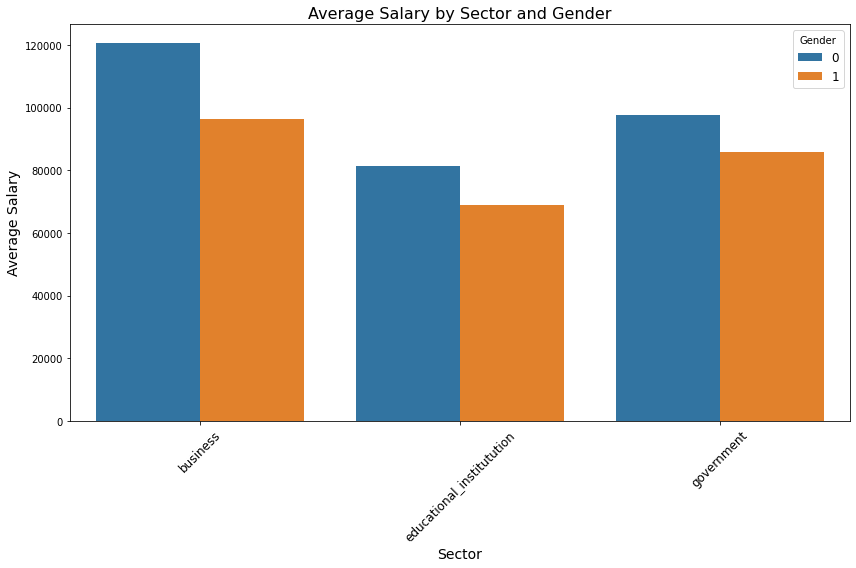

In [ ]:
# Plot figure
plt.figure(figsize=(12, 8))

# Create bar plot
sns.barplot(
    data=result,
    x='sector',
    y='avg_salary',
    hue='gender', 
    ci=None 
)

plt.title('Average Salary by Sector and Gender', fontsize=16)
plt.ylabel('Average Salary', fontsize=14)
plt.xlabel('Sector', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Gender', fontsize=12)
plt.tight_layout()

# Display plot
plt.show()

Within all sectors, men have a higher average salary than women.



## Average Salary by Gender in the Business Sector



hex_cell_a1e6327d-6e3c-41c1-83fa-9ae08c9490fc.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


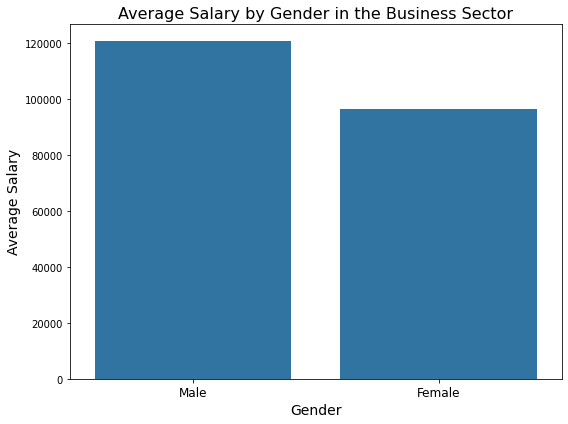

In [ ]:
# Filter for the business sector
business_result = result[result['sector'] == 'business']

# Plot figure
plt.figure(figsize=(8, 6))

# Create bar plot for business sector
sns.barplot(
    data=business_result,
    x='gender',
    y='avg_salary',
    ci=None 
)

plt.title('Average Salary by Gender in the Business Sector', fontsize=16)
plt.ylabel('Average Salary', fontsize=14)
plt.xlabel('Gender', fontsize=14)
plt.xticks([0, 1], ['Male', 'Female'], fontsize=12)
plt.tight_layout()

# Display plot
plt.show()

# Gender Segregation by Occupation Group



In [ ]:
# Filter for occupation group 
private_corp_data = data[data['private_corp'] == 1]

# Gender Distribution
gender_dist = (
    private_corp_data.groupby(['occupation_group', 'gender'])
    .agg(
        total_employees=('earn', 'size'),  # Count employees
        average_earn=('earn', lambda x: round(x.mean(), 2) if len(x) > 0 else 0)  
    )
    .reset_index()
)

# Percent Female Employees and Pay Gap
percent_female_employees = (
    gender_dist.groupby('occupation_group')
    .apply(lambda group: pd.Series({
        'total_employees': group['total_employees'].sum(),
        'percent_female': (
            group.loc[group['gender'] == 1, 'total_employees'].sum() * 100.0
            / group['total_employees'].sum()
        ) if group['total_employees'].sum() > 0 else 0,
        'pay_gap': (
            (group.loc[group['gender'] == 1, 'average_earn'].sum() * 100.0)
            / group.loc[group['gender'] == 0, 'average_earn'].sum()
        ) if (group['gender'] == 0).any() and (group['gender'] == 1).any() else None
    }))
).reset_index()

# gender Manager Distribution
gender_manager_dist = (
    private_corp_data[private_corp_data['leadership_roles'] == 1] 
    .groupby(['occupation_group', 'gender'])
    .agg(total_managers=('leadership_roles', 'size')) 
    .reset_index()
)

# Percent Female Managers
percent_female_managers = (
    gender_manager_dist.groupby('occupation_group')
    .apply(lambda group: pd.Series({
        'total_female_managers': group.loc[group['gender'] == 1, 'total_managers'].sum(),
        'total_managers': group['total_managers'].sum(),
        'percent_female_managers': (
            group.loc[group['gender'] == 1, 'total_managers'].sum() * 100.0
            / group['total_managers'].sum()
        ) if group['total_managers'].sum() > 0 else 0
    }))
).reset_index()

# Combine Percent Female Employees and Managers
result = (
    percent_female_employees.merge(
        percent_female_managers, on='occupation_group', how='left'
    )
    .sort_values(by='occupation_group')
)

# Add male employees
result['percent_male'] = 100 - result['percent_female']

result['percent_female'] = result['percent_female'].round(2)
result['percent_male'] = result['percent_male'].round(2)
result['pay_gap'] = result['pay_gap'].round(2)

final_result = result[['occupation_group', 'total_employees', 'percent_female', 'percent_male', 'pay_gap']]

# Print final result
final_result

# Sort final_result by descending order
sorted_result = final_result.sort_values(by='pay_gap', ascending=False)

# Display the sorted result
sorted_result

,occupation_group,total_employees,percent_female,percent_male,pay_gap
3,engineers,7867.0,15.95,84.05,90.41
1,bio_life_scientists,1195.0,48.79,51.21,87.35
2,computer_scientists,6546.0,24.20,75.80,85.19
5,physical_scientists_related,1004.0,33.67,66.33,83.97
6,social_scientists_related,306.0,49.67,50.33,77.51
0,S&E_related_occupations,5934.0,38.05,61.95,74.09
4,non-S&E_occupations,12440.0,43.62,56.38,67.80


In [ ]:
# Filter for occupation group 
private_corp_data = data[data['private_corp'] == 1]

# Gender Distribution
gender_dist = (
    private_corp_data.groupby(['occupation_group', 'gender'])
    .agg(
        total_employees=('earn', 'size'), 
        average_earn=('earn', lambda x: round(x.mean(), 2)) 
    )
    .reset_index()
)

# Percent Female Employees and Pay Gap
percent_female_employees = (
    gender_dist.groupby('occupation_group')
    .apply(lambda group: pd.Series({
        'total_employees': group['total_employees'].sum(),
        'percent_female': (
            group.loc[group['gender'] == 1, 'total_employees'].sum() * 100.0
            / group['total_employees'].sum()
        ) if group['total_employees'].sum() > 0 else 0,
        'pay_gap': (
            group.loc[group['gender'] == 1, 'average_earn'].sum() * 100.0
            / group.loc[group['gender'] == 0, 'average_earn'].sum()
        ) if (group['gender'] == 0).any() else None
    }))
).reset_index()

# Classify overrepresentation and underrepresentation
percent_female_employees['representation'] = percent_female_employees['percent_female'].apply(
    lambda x: 'Overrepresented' if x > 50 else 'Underrepresented'
)

# Split into two groups
overrepresented = percent_female_employees[percent_female_employees['representation'] == 'Overrepresented']
underrepresented = percent_female_employees[percent_female_employees['representation'] == 'Underrepresented']

## Occupation Roles Where Women Are Overrepresented



In [ ]:
# Display results
print("Occupation roles where women are overrepresented:")
overrepresented[['occupation_group', 'percent_female']]

Occupation roles where women are overrepresented:


,occupation_group,percent_female


Women are not overrepresented within any of the occupation roles found in the dataset 



## Occupation Roles Where Women Are Underrepresented



In [ ]:
# Display results
print("Occupation roles where women are underrepresented:")
underrepresented[['occupation_group', 'percent_female']]

Occupation roles where women are underrepresented:


,occupation_group,percent_female
0,S&E_related_occupations,38.051904
1,bio_life_scientists,48.786611
2,computer_scientists,24.197984
3,engineers,15.952714
4,non-S&E_occupations,43.617363
5,physical_scientists_related,33.665339
6,social_scientists_related,49.673203


Women are underrepresented within all of the occupation roles found in the dataset 



## Occupation Group & Sector 



In [ ]:
# Calculate average salary, gender, occupation_group, and sector
average_earnings_by_gender = (
    data.groupby(['gender', 'occupation_group', 'sector'])
    .agg(
        average_earnings=('earn', lambda x: round(x.mean(), 2)),
        number_of_respondents=('earn', 'size')
    )
    .reset_index()
)

# Separate data for women and men
women = (
    average_earnings_by_gender[average_earnings_by_gender['gender'] == 1]
    .rename(columns={
        'average_earnings': 'average_women_earnings',
        'number_of_respondents': 'number_female_respondents'
    })
    [['occupation_group', 'sector', 'average_women_earnings', 'number_female_respondents']]
)

men = (
    average_earnings_by_gender[average_earnings_by_gender['gender'] == 0]
    .rename(columns={
        'average_earnings': 'average_men_earnings',
        'number_of_respondents': 'number_male_respondents'
    })
    [['occupation_group', 'sector', 'average_men_earnings', 'number_male_respondents']]
)

# Calculate percent_female
percent_female = (
    data.groupby(['occupation_group', 'sector'])
    .agg(percent_female=('gender', 'mean'))
    .reset_index()
)

# Combine women, men, and percent_female data
result = (
    women.merge(men, on=['occupation_group', 'sector'], how='inner') 
    .merge(percent_female, on=['occupation_group', 'sector'], how='inner') 
)

# Add total respondents and gender earnings gap
result['total_respondents'] = result['number_female_respondents'] + result['number_male_respondents']
result['gender_earnings_gap'] = (result['average_women_earnings'] / result['average_men_earnings']).round(2)

# Filter
result = result[result['total_respondents'] > 25]

# Sort percent_female in descending order
result = result.sort_values(by='percent_female', ascending=False)

# Display result
result

,occupation_group,sector,average_women_earnings,number_female_respondents,average_men_earnings,number_male_respondents,percent_female,total_respondents,gender_earnings_gap
13,non-S&E_occupations,educational_institutution,68688.54,2472,89550.90,1279,0.659024,3751,0.77
19,social_scientists_related,educational_institutution,71742.95,310,88965.71,173,0.641822,483,0.81
1,S&E_related_occupations,educational_institutution,73477.94,1304,85478.28,996,0.566957,2300,0.86
18,social_scientists_related,business,101706.69,270,131928.65,222,0.548780,492,0.77
14,non-S&E_occupations,government,81924.20,2017,96309.44,1856,0.520785,3873,0.85
3,bio_life_scientists,business,99466.34,710,114960.88,721,0.496157,1431,0.87
5,bio_life_scientists,government,81236.14,341,82036.93,348,0.494920,689,0.99
12,non-S&E_occupations,business,100603.79,7185,154414.28,7882,0.476870,15067,0.65
20,social_scientists_related,government,93284.19,296,100406.90,328,0.474359,624,0.93
4,bio_life_scientists,educational_institutution,61607.54,451,73104.67,527,0.461145,978,0.84


The data above is sorted by percent female, women dominate the educational institution sector yet are paid less than men within each occupation group. 



## Occupation Group & Business Sector 



In [ ]:
# Filter data for the business sector
business_data = data[data['sector'] == 'business']

# Calculate average salary, gender, and occupation_group for the business sector
average_earnings_by_gender = (
    business_data.groupby(['gender', 'occupation_group'])
    .agg(
        average_earnings=('earn', lambda x: round(x.mean(), 2)),
        number_of_respondents=('earn', 'size')
    )
    .reset_index()
)

# Separate data for women and men
women = (
    average_earnings_by_gender[average_earnings_by_gender['gender'] == 1]
    .rename(columns={
        'average_earnings': 'average_women_earnings',
        'number_of_respondents': 'number_female_respondents'
    })
    [['occupation_group', 'average_women_earnings', 'number_female_respondents']]
)

men = (
    average_earnings_by_gender[average_earnings_by_gender['gender'] == 0]
    .rename(columns={
        'average_earnings': 'average_men_earnings',
        'number_of_respondents': 'number_male_respondents'
    })
    [['occupation_group', 'average_men_earnings', 'number_male_respondents']]
)

# Calculate percent_female for the business sector
percent_female = (
    business_data.groupby(['occupation_group'])
    .agg(percent_female=('gender', 'mean'))
    .reset_index()
)

# Combine women, men, and percent_female data
result = (
    women.merge(men, on='occupation_group', how='inner') 
    .merge(percent_female, on='occupation_group', how='inner') 
)

# Add total respondents and gender earnings gap
result['total_respondents'] = result['number_female_respondents'] + result['number_male_respondents']
result['gender_earnings_gap'] = (result['average_women_earnings'] / result['average_men_earnings']).round(2)

# Filter to include only occupation groups with more than 25 responses
result = result[result['total_respondents'] > 25]

# Sort by percent_female in descending order
result = result.sort_values(by='percent_female', ascending=False)

# Display the result
result

,occupation_group,average_women_earnings,number_female_respondents,average_men_earnings,number_male_respondents,percent_female,total_respondents,gender_earnings_gap
6,social_scientists_related,101706.69,270,131928.65,222,0.548780,492,0.77
1,bio_life_scientists,99466.34,710,114960.88,721,0.496157,1431,0.87
4,non-S&E_occupations,100603.79,7185,154414.28,7882,0.476870,15067,0.65
0,S&E_related_occupations,97880.85,3535,135695.49,4167,0.458972,7702,0.72
5,physical_scientists_related,89015.06,358,106282.66,701,0.338055,1059,0.84
2,computer_scientists,124163.92,1774,147961.48,5258,0.252275,7032,0.84
3,engineers,110747.52,1287,121713.95,6735,0.160434,8022,0.91


## Average Earnings of Men vs Women by Occupation Group (Business Sector)



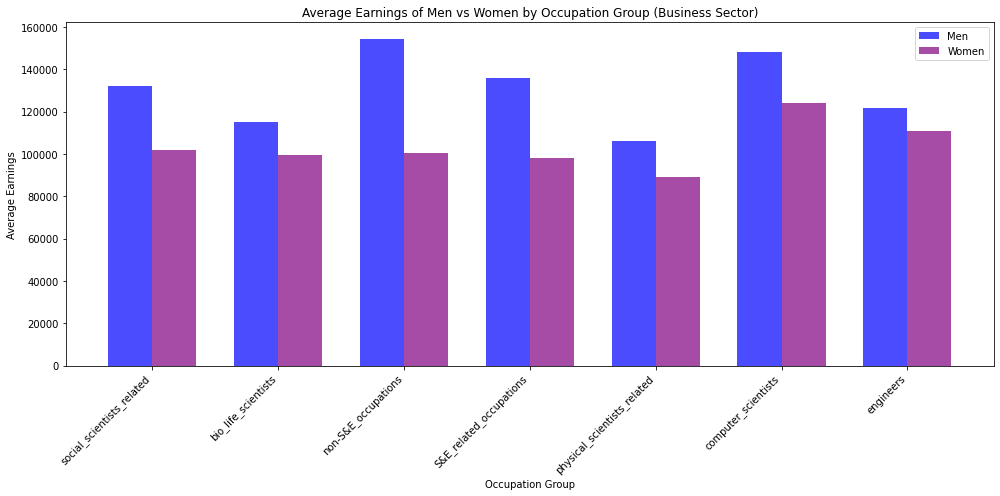

In [ ]:
# Set the figure size
plt.figure(figsize=(14, 7))

# Set positions for the bars
x = np.arange(len(result['occupation_group'])) 
width = 0.35 

# Plot bars for men's and women's earnings
plt.bar(x - width/2, result['average_men_earnings'], width, label='Men', color='blue', alpha=0.7)
plt.bar(x + width/2, result['average_women_earnings'], width, label='Women', color='purple', alpha=0.7)

# Add labels, title, and legend
plt.xticks(x, result['occupation_group'], rotation=45, ha='right')
plt.xlabel('Occupation Group')
plt.ylabel('Average Earnings')
plt.title('Average Earnings of Men vs Women by Occupation Group (Business Sector)')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

Across occupation groups within the business sector, men earn higher average salaries than women. 



## Additional Analysis: Occupation Group + Gender, Salary, and Educational Background



**Can salary differences between men and women within occupation groups be explained by educational background? **



In [ ]:
# Calculate average earnings and number of respondents by gender, occupation_group, and highest_degree_type
average_earnings_by_gender = (
    data.groupby(['gender', 'occupation_group', 'highest_degree_type'])
    .agg(
        average_earnings=('earn', lambda x: round(x.mean(), 2)),
        number_of_respondents=('earn', 'size')
    )
    .reset_index()
)

# Separate data for women and men 
women = (
    average_earnings_by_gender[average_earnings_by_gender['gender'] == 1]
    .rename(columns={'average_earnings': 'average_women_earnings'})
    [['occupation_group', 'highest_degree_type', 'average_women_earnings']]
)

men = (
    average_earnings_by_gender[average_earnings_by_gender['gender'] == 0]
    .rename(columns={'average_earnings': 'average_men_earnings'})
    [['occupation_group', 'highest_degree_type', 'average_men_earnings']]
)

# Calculate percent_female
percent_female = (
    data.groupby(['occupation_group', 'highest_degree_type'])
    .agg(percent_female=('gender', 'mean'))  
    .reset_index()
)

# Combine women, men, and percent_female data
result = (
    women.merge(men, on=['occupation_group', 'highest_degree_type'], how='inner')  
    .merge(percent_female, on=['occupation_group', 'highest_degree_type'], how='inner')  
)

# Add gender earnings gap
result['gender_earnings_gap'] = (result['average_women_earnings'] / result['average_men_earnings']).round(2)

# Sort by percent_female in descending order
result = result.sort_values(by='percent_female', ascending=False).reset_index(drop=True)

# Display result
result

,occupation_group,highest_degree_type,average_women_earnings,average_men_earnings,percent_female,gender_earnings_gap
0,social_scientists_related,Professional,103181.64,119258.80,0.807692,0.87
1,non-S&E_occupations,Masters,96033.61,149346.69,0.553792,0.64
2,social_scientists_related,Masters,80908.97,99856.54,0.552124,0.81
3,bio_life_scientists,Masters,80855.29,88093.14,0.551091,0.92
4,S&E_related_occupations,Masters,94978.12,128743.49,0.543916,0.74
5,social_scientists_related,Doctorate,104329.40,134637.23,0.537915,0.77
6,S&E_related_occupations,Professional,135434.14,195420.80,0.524150,0.69
7,social_scientists_related,Bachelors,81948.80,90681.00,0.511494,0.90
8,non-S&E_occupations,Professional,141971.67,208825.79,0.503297,0.68
9,bio_life_scientists,Bachelors,72620.45,69706.25,0.500000,1.04


### Occupation Group & Bachelor's Degree 



In [ ]:
# Filter data for individuals with a bachelor's degree
bachelors_data = data[data['highest_degree_type'] == 'Bachelors']

# Calculate average earnings, gender, and occupation_group for bachelor's degree holders
average_earnings_by_gender_bachelors = (
    bachelors_data.groupby(['gender', 'occupation_group'])
    .agg(
        average_earnings=('earn', lambda x: round(x.mean(), 2)),
        number_of_respondents=('earn', 'size')
    )
    .reset_index()
)

# Separate data for women and men
women_bachelors = (
    average_earnings_by_gender_bachelors[average_earnings_by_gender_bachelors['gender'] == 1]
    .rename(columns={
        'average_earnings': 'average_women_earnings',
        'number_of_respondents': 'number_female_respondents'
    })
    [['occupation_group', 'average_women_earnings', 'number_female_respondents']]
)

men_bachelors = (
    average_earnings_by_gender_bachelors[average_earnings_by_gender_bachelors['gender'] == 0]
    .rename(columns={
        'average_earnings': 'average_men_earnings',
        'number_of_respondents': 'number_male_respondents'
    })
    [['occupation_group', 'average_men_earnings', 'number_male_respondents']]
)

# Calculate percent_female for bachelor's degree holders
percent_female_bachelors = (
    bachelors_data.groupby(['occupation_group'])
    .agg(percent_female=('gender', 'mean'))  
    .reset_index()
)

# Combine women, men, and percent_female data for bachelor's degree holders
result_bachelors = (
    women_bachelors.merge(men_bachelors, on=['occupation_group'], how='inner') 
    .merge(percent_female_bachelors, on=['occupation_group'], how='inner') 
)

# Add total respondents and gender earnings gap
result_bachelors['total_respondents'] = result_bachelors['number_female_respondents'] + result_bachelors['number_male_respondents']
result_bachelors['gender_earnings_gap'] = (result_bachelors['average_women_earnings'] / result_bachelors['average_men_earnings']).round(2)

# Filter rows
result_bachelors = result_bachelors[result_bachelors['total_respondents'] > 25]

# Sort by percent_female in descending order
result_bachelors = result_bachelors.sort_values(by='percent_female', ascending=False)

# Display result
result_bachelors

,occupation_group,average_women_earnings,number_female_respondents,average_men_earnings,number_male_respondents,percent_female,total_respondents,gender_earnings_gap
6,social_scientists_related,81948.80,178,90681.00,170,0.511494,348,0.90
1,bio_life_scientists,72620.45,564,69706.25,564,0.500000,1128,1.04
4,non-S&E_occupations,79572.22,6357,119458.79,6388,0.498784,12745,0.67
0,S&E_related_occupations,79045.20,2544,110579.41,3255,0.438696,5799,0.71
5,physical_scientists_related,73764.06,374,85436.53,657,0.362755,1031,0.86
2,computer_scientists,100995.79,1121,124871.43,3474,0.243961,4595,0.81
3,engineers,102389.28,888,111112.36,4776,0.156780,5664,0.92


hex_cell_6d75f522-46f1-40fe-bff8-9d4f916b6f71.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


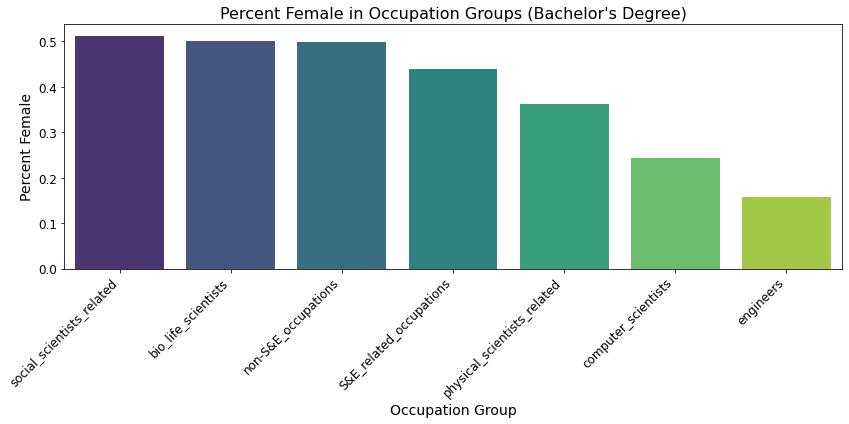

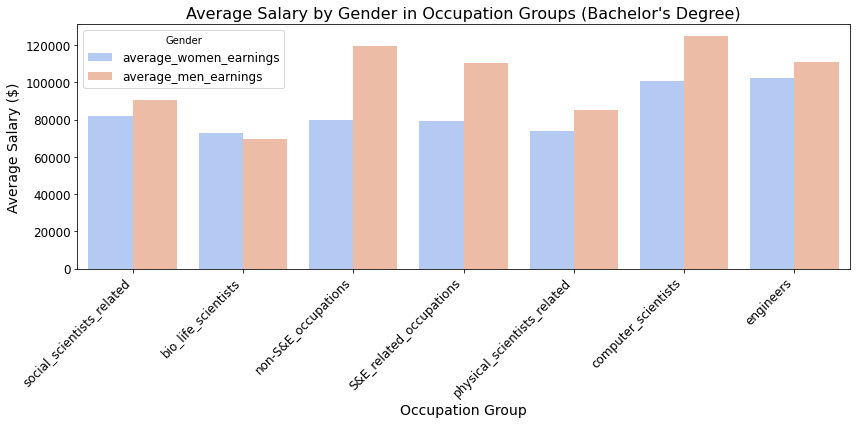

In [ ]:
# Plot the percentage of females by occupation group
plt.figure(figsize=(12, 6))
sns.barplot(
    data=result_bachelors,
    x='occupation_group',
    y='percent_female',
    palette='viridis'
)

# Add labels and title
plt.xlabel('Occupation Group', fontsize=14)
plt.ylabel('Percent Female', fontsize=14)
plt.title('Percent Female in Occupation Groups (Bachelor\'s Degree)', fontsize=16)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Plot average salaries for women and men by occupation group
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(
    data=result_bachelors.melt(id_vars='occupation_group', value_vars=['average_women_earnings', 'average_men_earnings'], 
                               var_name='Gender', value_name='Average Salary'),
    x='occupation_group',
    y='Average Salary',
    hue='Gender',
    palette='coolwarm'
)

# Add labels and title 
plt.xlabel('Occupation Group', fontsize=14)
plt.ylabel('Average Salary ($)', fontsize=14)
plt.title('Average Salary by Gender in Occupation Groups (Bachelor\'s Degree)', fontsize=16)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.yticks(fontsize=12)
plt.legend(title='Gender', fontsize=12)  
plt.tight_layout()
plt.show()

The bar chart above compares the average salaries of men and women within various occupation groups for individuals holding a bachelor's degree. Across all occupation groups, men consistently earn more than women, with noticeable disparities in high-paying fields such as engineering, computer science, and physical sciences. As women and men hold the same degree, educational background does not explain these wage gap disparities. 



### Occupation Group & Master's Degree



In [ ]:
# Filter data for individuals with a master's degree
masters_data = data[data['highest_degree_type'] == 'Masters']

# Calculate average earnings, gender, and occupation_group for master's degree holders
average_earnings_by_gender_masters = (
    masters_data.groupby(['gender', 'occupation_group'])
    .agg(
        average_earnings=('earn', lambda x: round(x.mean(), 2)),
        number_of_respondents=('earn', 'size')
    )
    .reset_index()
)

# Separate data for women and men
women_masters = (
    average_earnings_by_gender_masters[average_earnings_by_gender_masters['gender'] == 1]
    .rename(columns={
        'average_earnings': 'average_women_earnings',
        'number_of_respondents': 'number_female_respondents'
    })
    [['occupation_group', 'average_women_earnings', 'number_female_respondents']]
)

men_masters = (
    average_earnings_by_gender_masters[average_earnings_by_gender_masters['gender'] == 0]
    .rename(columns={
        'average_earnings': 'average_men_earnings',
        'number_of_respondents': 'number_male_respondents'
    })
    [['occupation_group', 'average_men_earnings', 'number_male_respondents']]
)

# Calculate percent_female for master's degree holders
percent_female_masters = (
    masters_data.groupby(['occupation_group'])
    .agg(percent_female=('gender', 'mean')) 
    .reset_index()
)

# Combine women, men, and percent_female data for master's degree holders
result_masters = (
    women_masters.merge(men_masters, on=['occupation_group'], how='inner') 
    .merge(percent_female_masters, on=['occupation_group'], how='inner') 
)

# Add total respondents and gender earnings gap
result_masters['total_respondents'] = result_masters['number_female_respondents'] + result_masters['number_male_respondents']
result_masters['gender_earnings_gap'] = (result_masters['average_women_earnings'] / result_masters['average_men_earnings']).round(2)

# Filter rows
result_masters = result_masters[result_masters['total_respondents'] > 25]

# Sort by percent_female in descending order
result_masters = result_masters.sort_values(by='percent_female', ascending=False)

# Display result
result_masters

,occupation_group,average_women_earnings,number_female_respondents,average_men_earnings,number_male_respondents,percent_female,total_respondents,gender_earnings_gap
4,non-S&E_occupations,96033.61,4432,149346.69,3571,0.553792,8003,0.64
6,social_scientists_related,80908.97,429,99856.54,348,0.552124,777,0.81
1,bio_life_scientists,80855.29,480,88093.14,391,0.551091,871,0.92
0,S&E_related_occupations,94978.12,2217,128743.49,1859,0.543916,4076,0.74
5,physical_scientists_related,84561.97,195,93087.01,283,0.407950,478,0.91
2,computer_scientists,125619.95,963,153470.14,2132,0.311147,3095,0.82
3,engineers,112514.86,610,127399.86,2586,0.190864,3196,0.88


hex_cell_5de3fdd6-6dc7-48d3-8f2c-c34b350ad160.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


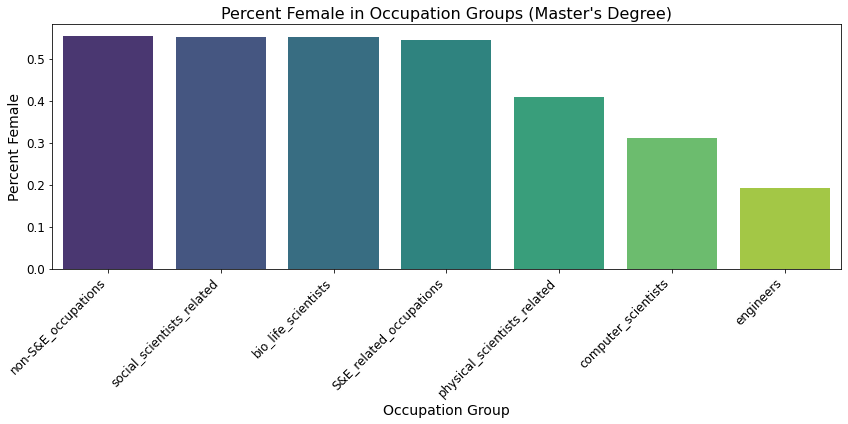

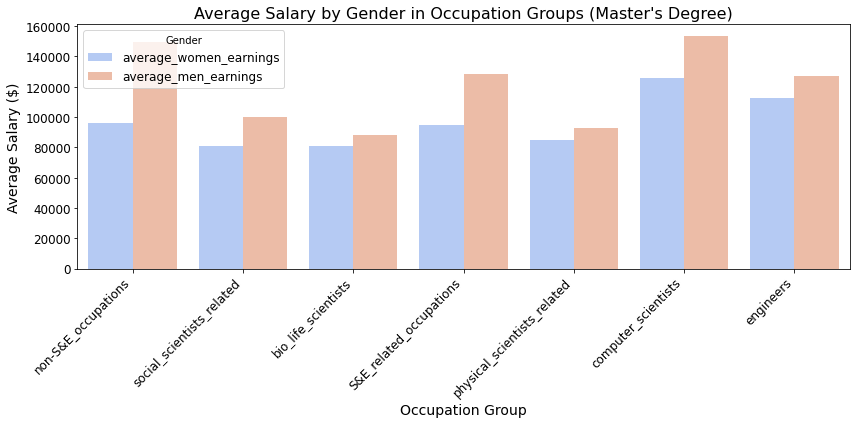

In [ ]:
# Plot the percentage of females by occupation group
plt.figure(figsize=(12, 6))
sns.barplot(
    data=result_masters,
    x='occupation_group',
    y='percent_female',
    palette='viridis'
)

# Add labels and title
plt.xlabel('Occupation Group', fontsize=14)
plt.ylabel('Percent Female', fontsize=14)
plt.title('Percent Female in Occupation Groups (Master\'s Degree)', fontsize=16)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Plot average salaries for women and men by occupation group
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(
    data=result_masters.melt(id_vars='occupation_group', value_vars=['average_women_earnings', 'average_men_earnings'], 
                             var_name='Gender', value_name='Average Salary'),
    x='occupation_group',
    y='Average Salary',
    hue='Gender',
    palette='coolwarm'
)

# Add labels and title
plt.xlabel('Occupation Group', fontsize=14)
plt.ylabel('Average Salary ($)', fontsize=14)
plt.title('Average Salary by Gender in Occupation Groups (Master\'s Degree)', fontsize=16)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.yticks(fontsize=12)
plt.legend(title='Gender', fontsize=12) 
plt.tight_layout()
plt.show()

The plots above compares the average salaries of men and women within various occupation groups for individuals holding a master’s degree. Across all occupation groups, men consistently earn more than women, with noticeable disparities in high-paying fields such as engineering, computer science, and physical sciences. As women and men hold the same degree, educational background does not explain these wage gap disparities. 



### Occupation Group & Doctorate 



In [ ]:
# Filter data for individuals with a doctorate degree
doctorate_data = data[data['highest_degree_type'] == 'Doctorate']

# Calculate average earnings, gender, and occupation_group for doctorate degree holders
average_earnings_by_gender_doctorate = (
    doctorate_data.groupby(['gender', 'occupation_group'])
    .agg(
        average_earnings=('earn', lambda x: round(x.mean(), 2)),
        number_of_respondents=('earn', 'size')
    )
    .reset_index()
)

# Separate data for women and men
women_doctorate = (
    average_earnings_by_gender_doctorate[average_earnings_by_gender_doctorate['gender'] == 1]
    .rename(columns={
        'average_earnings': 'average_women_earnings',
        'number_of_respondents': 'number_female_respondents'
    })
    [['occupation_group', 'average_women_earnings', 'number_female_respondents']]
)

men_doctorate = (
    average_earnings_by_gender_doctorate[average_earnings_by_gender_doctorate['gender'] == 0]
    .rename(columns={
        'average_earnings': 'average_men_earnings',
        'number_of_respondents': 'number_male_respondents'
    })
    [['occupation_group', 'average_men_earnings', 'number_male_respondents']]
)

# Calculate percent_female for doctorate degree holders
percent_female_doctorate = (
    doctorate_data.groupby(['occupation_group'])
    .agg(percent_female=('gender', 'mean'))
    .reset_index()
)

# Combine women, men, and percent_female data for doctorate degree holders
result_doctorate = (
    women_doctorate.merge(men_doctorate, on=['occupation_group'], how='inner')  
    .merge(percent_female_doctorate, on=['occupation_group'], how='inner')  
)

# Add total respondents and gender earnings gap
result_doctorate['total_respondents'] = result_doctorate['number_female_respondents'] + result_doctorate['number_male_respondents']
result_doctorate['gender_earnings_gap'] = (result_doctorate['average_women_earnings'] / result_doctorate['average_men_earnings']).round(2)

# Filter rows
result_doctorate = result_doctorate[result_doctorate['total_respondents'] > 25]

# Sort by percent_female in descending order
result_doctorate = result_doctorate.sort_values(by='percent_female', ascending=False)

# Display result
result_doctorate


,occupation_group,average_women_earnings,number_female_respondents,average_men_earnings,number_male_respondents,percent_female,total_respondents,gender_earnings_gap
6,social_scientists_related,104329.40,227,134637.23,195,0.537915,422,0.77
0,S&E_related_occupations,117095.70,292,163740.65,399,0.422576,691,0.72
1,bio_life_scientists,100821.08,444,116828.35,621,0.416901,1065,0.86
4,non-S&E_occupations,143777.21,427,197310.64,606,0.413359,1033,0.73
2,computer_scientists,168015.07,152,194953.99,496,0.234568,648,0.86
5,physical_scientists_related,106137.83,90,120363.33,295,0.233766,385,0.88
3,engineers,141614.77,88,148808.92,487,0.153043,575,0.95


hex_cell_b3d83469-8707-4759-b4cf-8e272ed73d99.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


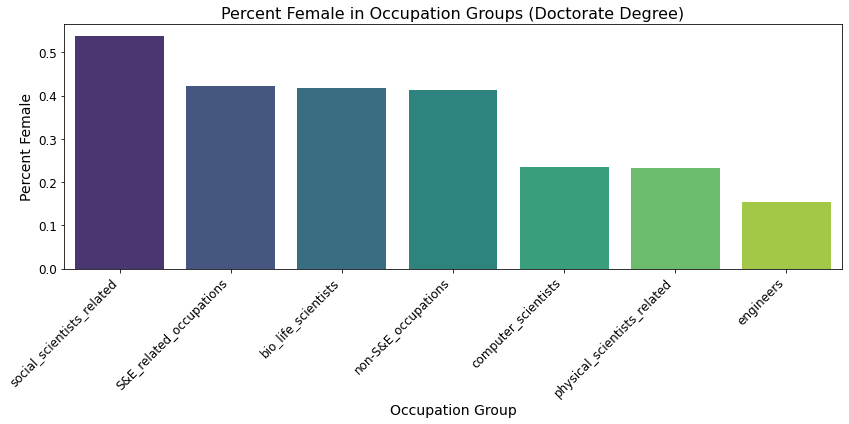

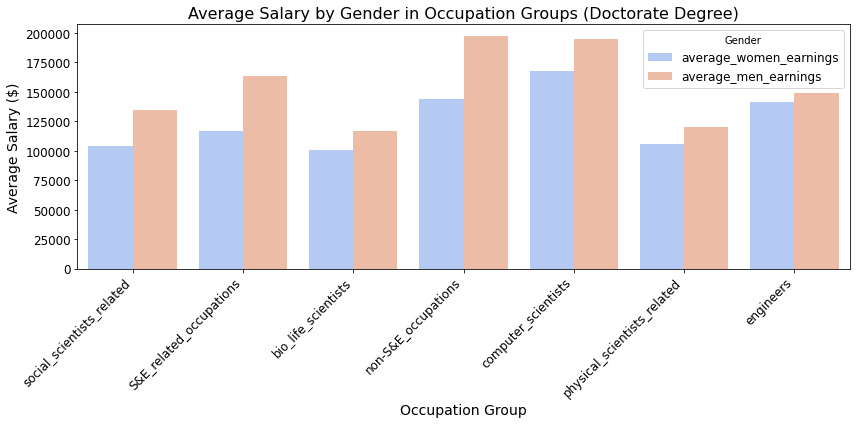

In [ ]:
# Plot the percentage of females by occupation group for doctorate degree holders
plt.figure(figsize=(12, 6))
sns.barplot(
    data=result_doctorate,
    x='occupation_group',
    y='percent_female',
    palette='viridis'
)

# Add labels and title
plt.xlabel('Occupation Group', fontsize=14)
plt.ylabel('Percent Female', fontsize=14)
plt.title('Percent Female in Occupation Groups (Doctorate Degree)', fontsize=16)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Plot the average salaries for women and men for doctorate degree holders
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(
    data=result_doctorate.melt(id_vars='occupation_group', value_vars=['average_women_earnings', 'average_men_earnings'], 
                               var_name='Gender', value_name='Average Salary'),
    x='occupation_group',
    y='Average Salary',
    hue='Gender',
    palette='coolwarm'
)

# Add labels and title
plt.xlabel('Occupation Group', fontsize=14)
plt.ylabel('Average Salary ($)', fontsize=14)
plt.title('Average Salary by Gender in Occupation Groups (Doctorate Degree)', fontsize=16)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.yticks(fontsize=12)
plt.legend(title='Gender', fontsize=12) 
plt.tight_layout()
plt.show()

The bar chart above compares the average salaries of men and women within various occupation groups for individuals holding a doctorate degree. Across all occupation groups, men consistently earn more than women, with the largest disparities appearing in high-paying fields such as engineering, computer science, and physical sciences. As women and men hold the same degree, educational background does not explain these wage gap disparities.



### Occupation Group & Professional



In [ ]:
# Filter data for individuals with a professional degree
professional_data = data[data['highest_degree_type'] == 'Professional']

# Calculate average earnings, gender, and occupation_group for professional degree holders
average_earnings_by_gender_professional = (
    professional_data.groupby(['gender', 'occupation_group'])
    .agg(
        average_earnings=('earn', lambda x: round(x.mean(), 2)),
        number_of_respondents=('earn', 'size')
    )
    .reset_index()
)

# Separate data for women and men
women_professional = (
    average_earnings_by_gender_professional[average_earnings_by_gender_professional['gender'] == 1]
    .rename(columns={
        'average_earnings': 'average_women_earnings',
        'number_of_respondents': 'number_female_respondents'
    })
    [['occupation_group', 'average_women_earnings', 'number_female_respondents']]
)

men_professional = (
    average_earnings_by_gender_professional[average_earnings_by_gender_professional['gender'] == 0]
    .rename(columns={
        'average_earnings': 'average_men_earnings',
        'number_of_respondents': 'number_male_respondents'
    })
    [['occupation_group', 'average_men_earnings', 'number_male_respondents']]
)

# Calculate percent_female for professional degree holders
percent_female_professional = (
    professional_data.groupby(['occupation_group'])
    .agg(percent_female=('gender', 'mean')) 
    .reset_index()
)

# Combine women, men, and percent_female data for professional degree holders
result_professional = (
    women_professional.merge(men_professional, on=['occupation_group'], how='inner')  
    .merge(percent_female_professional, on=['occupation_group'], how='inner') 
)

# Add total respondents and gender earnings gap
result_professional['total_respondents'] = result_professional['number_female_respondents'] + result_professional['number_male_respondents']
result_professional['gender_earnings_gap'] = (result_professional['average_women_earnings'] / result_professional['average_men_earnings']).round(2)

# Filter rows 
result_professional = result_professional[result_professional['total_respondents'] > 25]

# Sort by percent_female in descending order
result_professional = result_professional.sort_values(by='percent_female', ascending=False)

# Display result
result_professional

,occupation_group,average_women_earnings,number_female_respondents,average_men_earnings,number_male_respondents,percent_female,total_respondents,gender_earnings_gap
6,social_scientists_related,103181.64,42,119258.80,10,0.807692,52,0.87
0,S&E_related_occupations,135434.14,293,195420.80,266,0.524150,559,0.69
4,non-S&E_occupations,141971.67,458,208825.79,452,0.503297,910,0.68
1,bio_life_scientists,112470.86,14,182632.75,20,0.411765,34,0.62


hex_cell_d7cc0bc2-33e1-4f29-b7f5-c04f621d464d.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


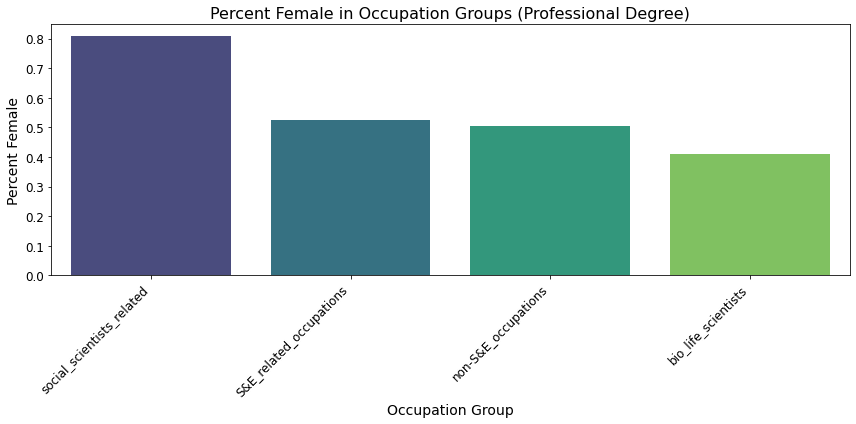

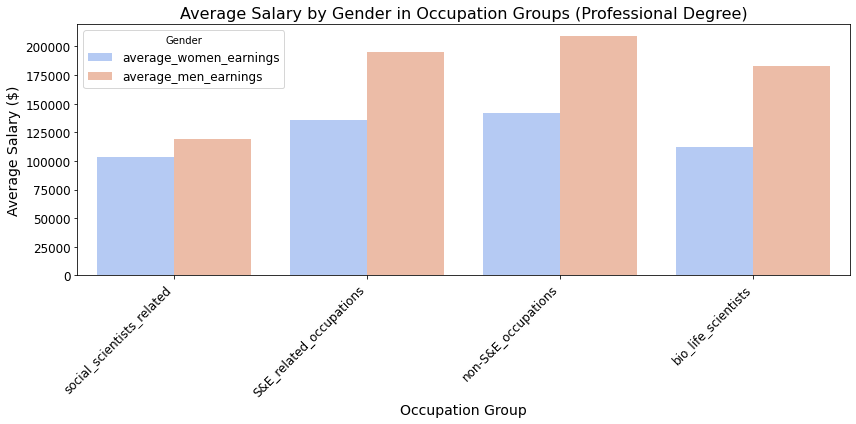

In [ ]:
# Plot the percentage of females by occupation group for professional degree holders
plt.figure(figsize=(12, 6))
sns.barplot(
    data=result_professional,
    x='occupation_group',
    y='percent_female',
    palette='viridis'
)

# Add labels and title 
plt.xlabel('Occupation Group', fontsize=14)
plt.ylabel('Percent Female', fontsize=14)
plt.title('Percent Female in Occupation Groups (Professional Degree)', fontsize=16)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Plot the average salaries for women and men for professional degree holders
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(
    data=result_professional.melt(id_vars='occupation_group', value_vars=['average_women_earnings', 'average_men_earnings'], 
                                  var_name='Gender', value_name='Average Salary'),
    x='occupation_group',
    y='Average Salary',
    hue='Gender',
    palette='coolwarm'
)

# Add labels and title 
plt.xlabel('Occupation Group', fontsize=14)
plt.ylabel('Average Salary ($)', fontsize=14)
plt.title('Average Salary by Gender in Occupation Groups (Professional Degree)', fontsize=16)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.yticks(fontsize=12)
plt.legend(title='Gender', fontsize=12)  
plt.tight_layout()
plt.show()

The bar chart above compares the average salaries of men and women within various occupation groups for individuals holding a professional degree. Across all occupation groups, men consistently earn more than women, with significant disparities observed in high-paying fields such as S&E-related occupations and bio-life sciences. As women and men hold the same degree, educational background does not explain these wage gap disparities.



## Additional Analysis: Sector + Gender, Salary, and Leadership Role 



### Leadership Roles 



In [ ]:
# Print leadership representation 
leadership_representation[['gender', 'leadership_count', 'total_count']]

,gender,leadership_count,total_count
0,0,6221,34320
1,1,4848,23887


### Leadership Representation by Gender 



In [ ]:
# Define the leadership roles
leadership_job_codes = [
    'mid_level_manager', 'c_suite_manager', 'personnel_mgmt', 'financial_mgmt', 'other_management_occupations'
]

leadership_mapping = {
    621420: 'mid_level_manager',
    621430: 'c_suite_manager',
    721520: 'personnel_mgmt',
    721510: 'financial_mgmt',
    721530: 'other_management_occupations'
}

data['leadership_job_codes'] = data['n3ocpr'].map(leadership_mapping)

# Create a binary column 'is_leadership'
data['is_leadership'] = data['leadership_job_codes'].isin(leadership_job_codes).astype(int)

# Filter data to include individuals in leadership roles
leadership_data = data[data['is_leadership'] == 1]

# Group by gender
leadership_counts = leadership_data.groupby(['gender']).size().reset_index(name='leadership_count')

# Get the total counts for each gender group
total_counts = data.groupby(['gender']).size().reset_index(name='total_count')

# Merge leadership counts with total counts
leadership_representation = pd.merge(leadership_counts, total_counts, on=['gender'])

# Display dataframe
print("Leadership Representation by Gender:")
leadership_representation

Leadership Representation by Gender:


,gender,leadership_count,total_count
0,0,4922,34320
1,1,4074,23887


Men have a total leadership count of 4922 while women have a total leadership count of 4074. Therefore, men have higher leadership roles than women. 



## Salary Comparison for Leadership Roles within the Business Sector 



In [ ]:
# Filter data for the business sector
business_data = data[data['sector'] == 'business']

# Define leadership roles of interest
leadership_roles = [
    'mid_level_manager', 'c_suite_manager', 
    'personnel_mgmt', 'financial_mgmt', 'other_management_occupations'
]

# Create a column for leadership job titles
business_data['leadership_job_titles'] = business_data['leadership_job_codes'].apply(
    lambda x: x if x in leadership_roles else 'Non-leadership'
)

# Filter data for individuals in leadership roles within the business sector
business_leadership_data = business_data[business_data['leadership_job_titles'].isin(leadership_roles)]

# Group by leadership roles and gender
business_leadership_salary_stats = business_leadership_data.groupby(
    ['leadership_job_titles', 'gender']
)['salary'].agg(
    mean_salary='mean'
).reset_index()

# Separate data for men and women
women_business_leadership_salary = business_leadership_salary_stats[business_leadership_salary_stats['gender'] == 1].rename(
    columns={'mean_salary': 'mean_salary_women'}
)[['leadership_job_titles', 'mean_salary_women']]

men_business_leadership_salary = business_leadership_salary_stats[business_leadership_salary_stats['gender'] == 0].rename(
    columns={'mean_salary': 'mean_salary_men'}
)[['leadership_job_titles', 'mean_salary_men']]

# Merge the men and women salary data
business_leadership_salary_comparison = pd.merge(
    women_business_leadership_salary, men_business_leadership_salary, 
    on='leadership_job_titles', how='inner'
)

# Calculate the salary difference
business_leadership_salary_comparison['salary_difference'] = (
    business_leadership_salary_comparison['mean_salary_men'] - business_leadership_salary_comparison['mean_salary_women']
).round(2)

# Calculate the salary ratio 
business_leadership_salary_comparison['salary_ratio'] = (
    business_leadership_salary_comparison['mean_salary_women'] / business_leadership_salary_comparison['mean_salary_men']
).round(2)

# Sort results by salary difference
business_leadership_salary_comparison = business_leadership_salary_comparison.sort_values(
    by='salary_difference', ascending=False
).reset_index(drop=True)

# Display the results
business_leadership_salary_comparison

hex_cell_501672d7-bfa2-48f2-a54c-dbef0a637aff.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  business_data['leadership_job_titles'] = business_data['leadership_job_codes'].apply(


,leadership_job_titles,mean_salary_women,mean_salary_men,salary_difference,salary_ratio
0,mid_level_manager,149681.313131,176017.134021,26335.82,0.85
1,financial_mgmt,98582.817150,120836.342045,22253.52,0.82
2,other_management_occupations,101487.568493,122152.974429,20665.41,0.83
3,c_suite_manager,136399.701220,150750.123188,14350.42,0.90
4,personnel_mgmt,86173.702970,91687.914773,5514.21,0.94


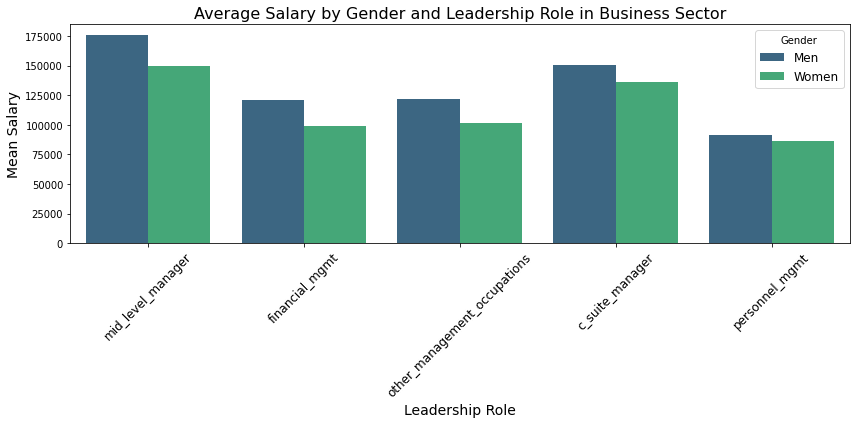

In [ ]:
# Melt data 
melted_data = business_leadership_salary_comparison.melt(
    id_vars='leadership_job_titles', 
    value_vars=['mean_salary_men', 'mean_salary_women'], 
    var_name='Gender', 
    value_name='Mean Salary'
)

# Replace gender column values
melted_data['Gender'] = melted_data['Gender'].replace({
    'mean_salary_men': 'Men', 
    'mean_salary_women': 'Women'
})

# Create grouped bar plot
plt.figure(figsize=(12, 6))

sns.barplot(
    data=melted_data, 
    x='leadership_job_titles', 
    y='Mean Salary', 
    hue='Gender', 
    palette='viridis'
)

plt.title('Average Salary by Gender and Leadership Role in Business Sector', fontsize=16)
plt.ylabel('Mean Salary', fontsize=14)
plt.xlabel('Leadership Role', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Gender', fontsize=12)
plt.tight_layout()

# Display plot
plt.show()

The bar chart above compares the average salaries of men and women across various leadership roles in the business sector. Men consistently earn more than women in all leadership roles, with the largest gaps observed in mid-level management and financial management positions. These disparities suggest that gender-based wage gaps persist even in leadership roles, despite women occupying similar positions of influence and responsibility.



## Salary Comparison for Leadership Roles within Occupation Groups



In [ ]:
leadership_roles = [
    'mid_level_manager', 'c_suite_manager', 
    'personnel_mgmt', 'financial_mgmt', 'other_management_occupations'
]

# Create a column for leadership job titles
data['leadership_job_titles'] = data['leadership_job_codes'].apply(
    lambda x: x if x in leadership_roles else 'Non-leadership'
)

# Filter data for individuals in leadership roles
leadership_data = data[data['leadership_job_titles'].isin(leadership_roles)]

# Group by occupation group, leadership roles, and gender
leadership_salary_stats = leadership_data.groupby(['occupation_group', 'leadership_job_titles', 'gender'])['salary'].agg(
    mean_salary='mean'
).reset_index()

# Separate data for men and women
women_leadership_salary = leadership_salary_stats[leadership_salary_stats['gender'] == 1].rename(
    columns={'mean_salary': 'mean_salary_women'}
)[['occupation_group', 'leadership_job_titles', 'mean_salary_women']]

men_leadership_salary = leadership_salary_stats[leadership_salary_stats['gender'] == 0].rename(
    columns={'mean_salary': 'mean_salary_men'}
)[['occupation_group', 'leadership_job_titles', 'mean_salary_men']]

# Merge the men and women salary data
leadership_salary_comparison = pd.merge(
    women_leadership_salary, men_leadership_salary, 
    on=['occupation_group', 'leadership_job_titles'], how='inner'
)

# Calculate the salary difference
leadership_salary_comparison['salary_difference'] = (
    leadership_salary_comparison['mean_salary_men'] - leadership_salary_comparison['mean_salary_women']
).round(2)

leadership_salary_comparison['salary_ratio'] = (
    leadership_salary_comparison['mean_salary_women'] / leadership_salary_comparison['mean_salary_men']
).round(2)

# Sort results by occupation group and salary difference
leadership_salary_comparison = leadership_salary_comparison.sort_values(
    by=['occupation_group', 'salary_difference'], ascending=[True, False]
).reset_index(drop=True)

# Display results
leadership_salary_comparison

,occupation_group,leadership_job_titles,mean_salary_women,mean_salary_men,salary_difference,salary_ratio
0,S&E_related_occupations,mid_level_manager,145133.543103,168121.374631,22987.83,0.86
1,S&E_related_occupations,c_suite_manager,133139.634146,146678.036810,13538.40,0.91
2,non-S&E_occupations,other_management_occupations,97793.846573,118186.812746,20392.97,0.83
3,non-S&E_occupations,financial_mgmt,95870.769697,116120.081537,20249.31,0.83
4,non-S&E_occupations,personnel_mgmt,83972.151786,90088.510121,6116.36,0.93


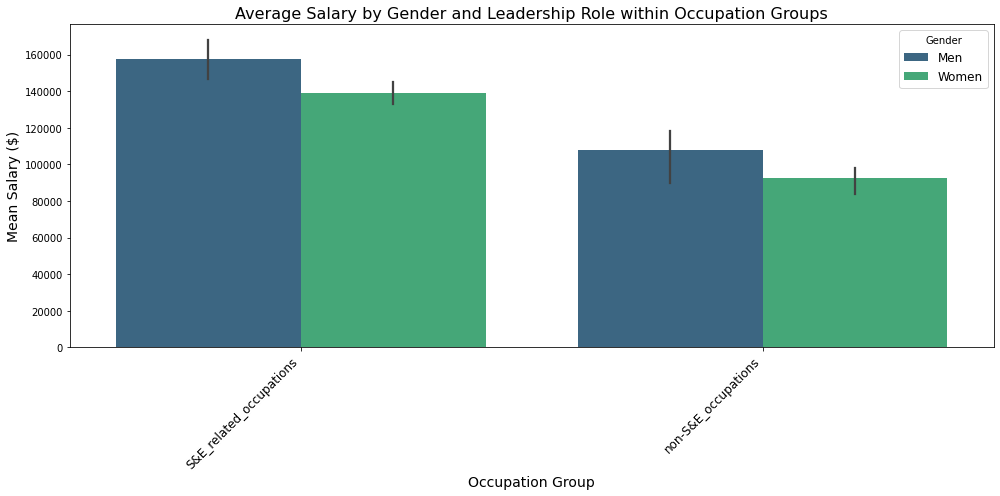

In [ ]:
# Melt data for bar plot
melted_data = leadership_salary_comparison.melt(
    id_vars=['occupation_group', 'leadership_job_titles'], 
    value_vars=['mean_salary_men', 'mean_salary_women'], 
    var_name='Gender', 
    value_name='Mean Salary'
)

# Replace gender column values
melted_data['Gender'] = melted_data['Gender'].replace({
    'mean_salary_men': 'Men', 
    'mean_salary_women': 'Women'
})

# Create grouped bar plot
plt.figure(figsize=(14, 7))

sns.barplot(
    data=melted_data, 
    x='occupation_group', 
    y='Mean Salary', 
    hue='Gender', 
    palette='viridis'
)

plt.title('Average Salary by Gender and Leadership Role within Occupation Groups', fontsize=16)
plt.ylabel('Mean Salary ($)', fontsize=14)
plt.xlabel('Occupation Group', fontsize=14)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.legend(title='Gender', fontsize=12)
plt.tight_layout()

# Display plot
plt.show()

The bar chart above compares the average salaries of men and women in leadership roles across different occupation groups. Men consistently earn more than women in both S&E-related and non-S&E occupations, with the wage gap being particularly pronounced in S&E-related occupations. These results highlight persistent salary disparities between genders, even within leadership roles in different occupational fields.



## Additional Analysis: Occupation Group + Gender, Salary, Leadership Role & Education Background 



In [ ]:
# Group by occupation group, leadership job titles, highest degree type, and gender
leadership_salary_stats_by_degree = leadership_data.groupby(
    ['occupation_group', 'leadership_job_titles', 'highest_degree_type', 'gender']
)['salary'].agg(
    mean_salary='mean'
).reset_index()

# Separate data for men and women
women_leadership_salary_by_degree = leadership_salary_stats_by_degree[
    leadership_salary_stats_by_degree['gender'] == 1
].rename(
    columns={'mean_salary': 'mean_salary_women'}
)[['occupation_group', 'leadership_job_titles', 'highest_degree_type', 'mean_salary_women']]

men_leadership_salary_by_degree = leadership_salary_stats_by_degree[
    leadership_salary_stats_by_degree['gender'] == 0
].rename(
    columns={'mean_salary': 'mean_salary_men'}
)[['occupation_group', 'leadership_job_titles', 'highest_degree_type', 'mean_salary_men']]

# Merge men and women salary data
leadership_salary_comparison_by_degree = pd.merge(
    women_leadership_salary_by_degree, men_leadership_salary_by_degree,
    on=['occupation_group', 'leadership_job_titles', 'highest_degree_type'], how='inner'
)

# Calculate salary difference 
leadership_salary_comparison_by_degree['salary_difference'] = (
    leadership_salary_comparison_by_degree['mean_salary_men'] - leadership_salary_comparison_by_degree['mean_salary_women']
).round(2)

leadership_salary_comparison_by_degree['salary_ratio'] = (
    leadership_salary_comparison_by_degree['mean_salary_women'] / leadership_salary_comparison_by_degree['mean_salary_men']
).round(2)

# Sort results by occupation group, leadership job titles, and salary difference
leadership_salary_comparison_by_degree = leadership_salary_comparison_by_degree.sort_values(
    by=['occupation_group', 'leadership_job_titles', 'salary_difference'], ascending=[True, True, False]
).reset_index(drop=True)

# Sort results by highest degree type, occupation group, leadership job titles, and salary difference
leadership_salary_comparison_by_degree_sorted = leadership_salary_comparison_by_degree.sort_values(
    by=['highest_degree_type', 'occupation_group', 'leadership_job_titles', 'salary_difference'], 
    ascending=[True, True, True, False]
).reset_index(drop=True)

# Display results
leadership_salary_comparison_by_degree_sorted

,occupation_group,leadership_job_titles,highest_degree_type,mean_salary_women,mean_salary_men,salary_difference,salary_ratio
0,S&E_related_occupations,c_suite_manager,Bachelors,123261.107843,134596.738977,11335.63,0.92
1,S&E_related_occupations,mid_level_manager,Bachelors,136957.500000,159195.941176,22238.44,0.86
2,non-S&E_occupations,financial_mgmt,Bachelors,91002.532925,102732.953846,11730.42,0.89
3,non-S&E_occupations,other_management_occupations,Bachelors,90519.430807,110137.568217,19618.14,0.82
4,non-S&E_occupations,personnel_mgmt,Bachelors,76482.588068,81306.256944,4823.67,0.94
5,S&E_related_occupations,c_suite_manager,Doctorate,120333.333333,206752.333333,86419.00,0.58
6,S&E_related_occupations,mid_level_manager,Doctorate,163800.000000,271967.500000,108167.50,0.60
7,non-S&E_occupations,financial_mgmt,Doctorate,158187.500000,176677.777778,18490.28,0.90
8,non-S&E_occupations,other_management_occupations,Doctorate,132458.183099,150469.989691,18011.81,0.88
9,non-S&E_occupations,personnel_mgmt,Doctorate,139638.333333,129310.571429,-10327.76,1.08


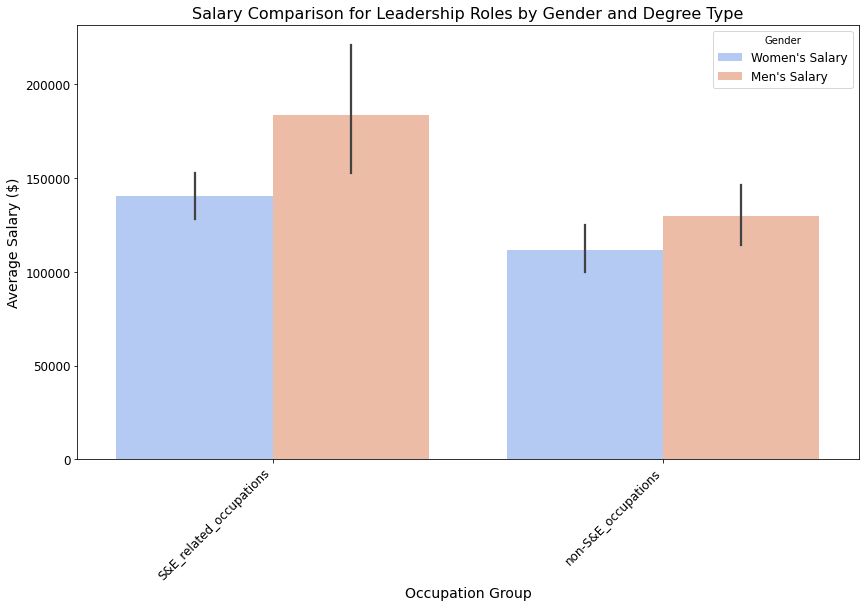

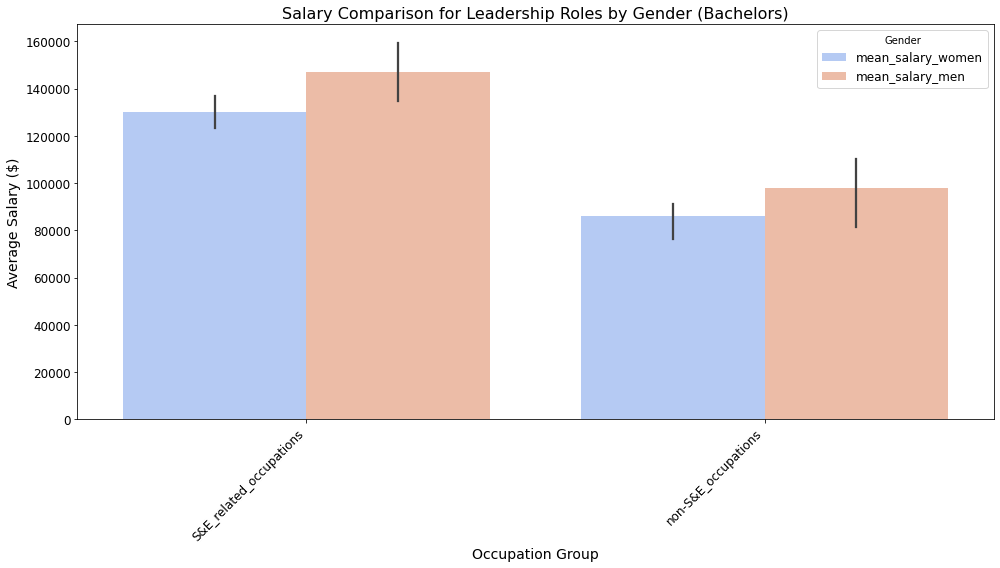

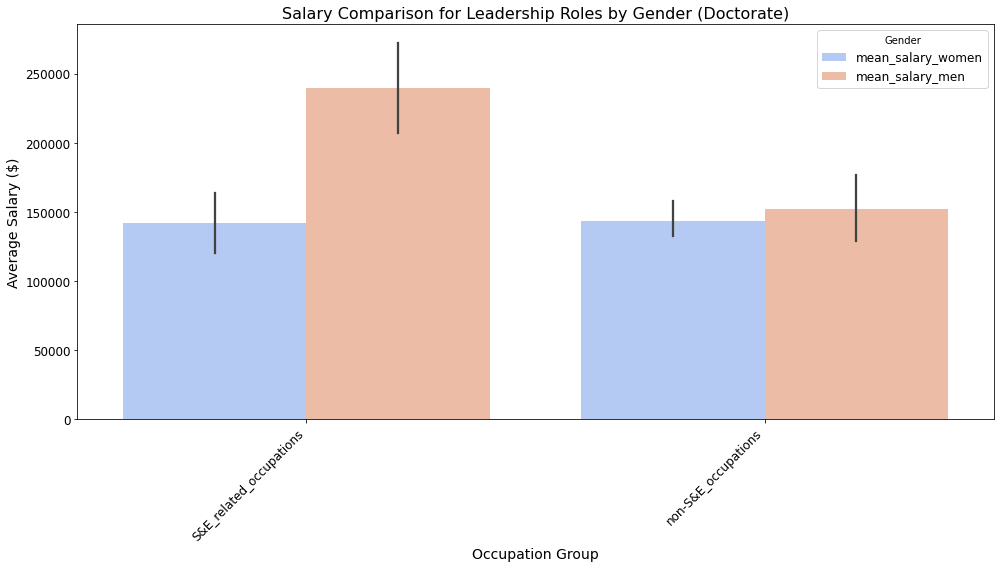

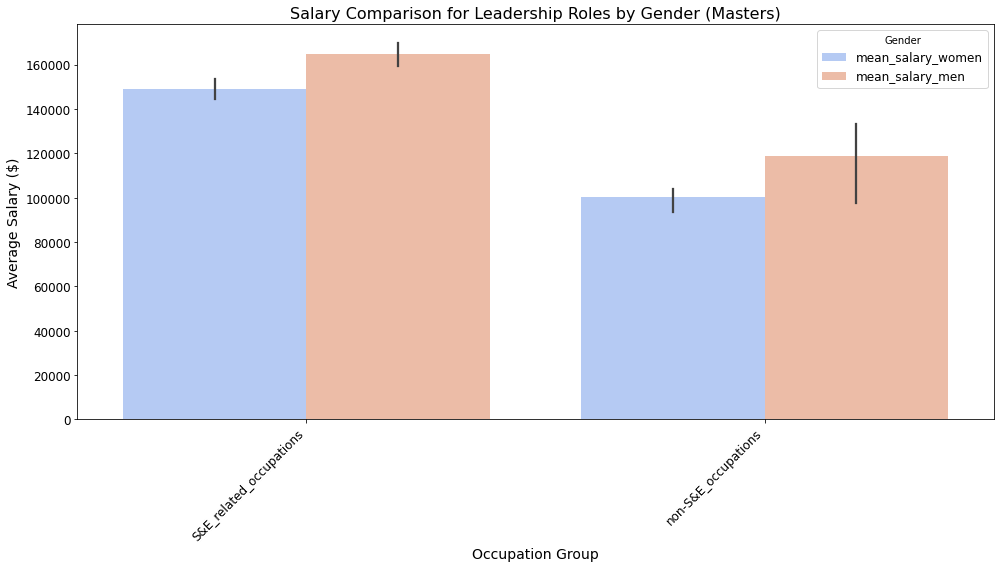

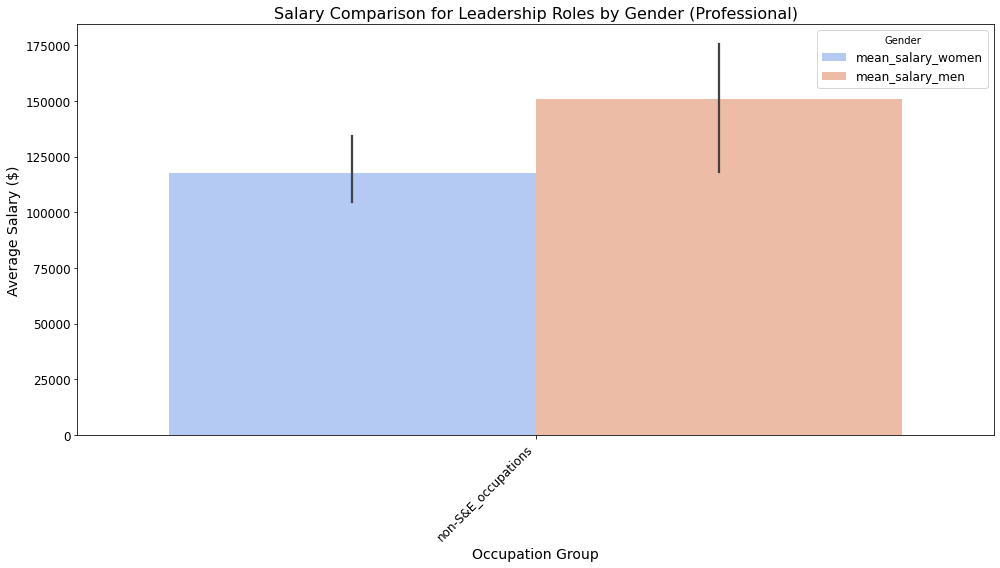

In [ ]:
# Prepare data
plot_data = leadership_salary_comparison_by_degree_sorted.copy()

# Melt dataframe
plot_data_melted = plot_data.melt(
    id_vars=['highest_degree_type', 'occupation_group', 'leadership_job_titles'], 
    value_vars=['mean_salary_women', 'mean_salary_men'], 
    var_name='Gender', value_name='Average Salary'
)

# Create a bar plot
plt.figure(figsize=(14, 8))
sns.barplot(
    data=plot_data_melted,
    x='occupation_group',
    y='Average Salary',
    hue='Gender',
    palette='coolwarm'
)

# Add labels and title
plt.xlabel('Occupation Group', fontsize=14)
plt.ylabel('Average Salary ($)', fontsize=14)
plt.title('Salary Comparison for Leadership Roles by Gender and Degree Type', fontsize=16)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.yticks(fontsize=12)

# Add legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Women\'s Salary', 'Men\'s Salary'], title='Gender', fontsize=12)

# Separate by degree type
degree_types = plot_data['highest_degree_type'].unique()
for degree_type in degree_types:
    subset = plot_data[plot_data['highest_degree_type'] == degree_type]
    plt.figure(figsize=(14, 8))
    sns.barplot(
        data=subset.melt(
            id_vars=['occupation_group', 'leadership_job_titles'], 
            value_vars=['mean_salary_women', 'mean_salary_men'], 
            var_name='Gender', value_name='Average Salary'
        ),
        x='occupation_group',
        y='Average Salary',
        hue='Gender',
        palette='coolwarm'
    )
    plt.xlabel('Occupation Group', fontsize=14)
    plt.ylabel('Average Salary ($)', fontsize=14)
    plt.title(f'Salary Comparison for Leadership Roles by Gender ({degree_type})', fontsize=16)
    plt.xticks(rotation=45, fontsize=12, ha='right')
    plt.yticks(fontsize=12)
    plt.legend(title='Gender', fontsize=12)
    plt.tight_layout()
    plt.show()


The bar charts above compare the average salaries of men and women in leadership roles across S&E-related and non-S&E occupations, grouped by degree type. Men consistently earn more than women in all categories, with a particularly large disparity in S&E-related occupations. These results highlight significant gender-based wage gaps in leadership roles, even among highly educated individuals.



## Additional analysis: Business Sector + Gender, Salary, Leadership Role & Education Background 



#### Can salary differences between men and women in the business sector within leadership roles be explained by educational background? 



In [ ]:
# Filter data for the business sector
business_data = leadership_data[leadership_data['sector'] == 'business']

# Group by leadership job titles, highest degree type, and gender
business_leadership_salary_by_degree = business_data.groupby(
    ['leadership_job_titles', 'highest_degree_type', 'gender']
)['salary'].agg(
    mean_salary='mean'
).reset_index()

# Separate data for men and women
women_business_salary_by_degree = business_leadership_salary_by_degree[
    business_leadership_salary_by_degree['gender'] == 1
].rename(
    columns={'mean_salary': 'mean_salary_women'}
)[['leadership_job_titles', 'highest_degree_type', 'mean_salary_women']]

men_business_salary_by_degree = business_leadership_salary_by_degree[
    business_leadership_salary_by_degree['gender'] == 0
].rename(
    columns={'mean_salary': 'mean_salary_men'}
)[['leadership_job_titles', 'highest_degree_type', 'mean_salary_men']]

# Merge men and women salary data
business_salary_comparison_by_degree = pd.merge(
    women_business_salary_by_degree, men_business_salary_by_degree,
    on=['leadership_job_titles', 'highest_degree_type'], how='inner'
)

# Calculate salary difference
business_salary_comparison_by_degree['salary_difference'] = (
    business_salary_comparison_by_degree['mean_salary_men'] - business_salary_comparison_by_degree['mean_salary_women']
).round(2)

# Calculate salary ratio 
business_salary_comparison_by_degree['salary_ratio'] = (
    business_salary_comparison_by_degree['mean_salary_women'] / business_salary_comparison_by_degree['mean_salary_men']
).round(2)

# Sort results by leadership role, highest degree type, and salary difference
business_salary_comparison_by_degree_sorted = business_salary_comparison_by_degree.sort_values(
    by=['leadership_job_titles', 'highest_degree_type', 'salary_difference'], 
    ascending=[True, True, False]
).reset_index(drop=True)

# Display results
business_salary_comparison_by_degree_sorted

,leadership_job_titles,highest_degree_type,mean_salary_women,mean_salary_men,salary_difference,salary_ratio
0,c_suite_manager,Bachelors,126190.813953,137636.799172,11445.99,0.92
1,c_suite_manager,Doctorate,120333.333333,220526.925926,100193.59,0.55
2,c_suite_manager,Masters,149932.513889,164743.084906,14810.57,0.91
3,financial_mgmt,Bachelors,93449.330153,106349.432532,12900.10,0.88
4,financial_mgmt,Doctorate,158187.500000,179559.090909,21371.59,0.88
5,financial_mgmt,Masters,107418.529412,139838.656958,32420.13,0.77
6,financial_mgmt,Professional,91916.666667,205061.625000,113144.96,0.45
7,mid_level_manager,Bachelors,142559.000000,165017.018519,22458.02,0.86
8,mid_level_manager,Doctorate,163800.000000,304685.909091,140885.91,0.54
9,mid_level_manager,Masters,156502.173913,179124.440678,22622.27,0.87


## Salary Comparison for Leadership Roles by Highest Degree Type within The Business Sector 



hex_cell_1bc3216c-0104-4a68-b751-68a6f07a0531.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


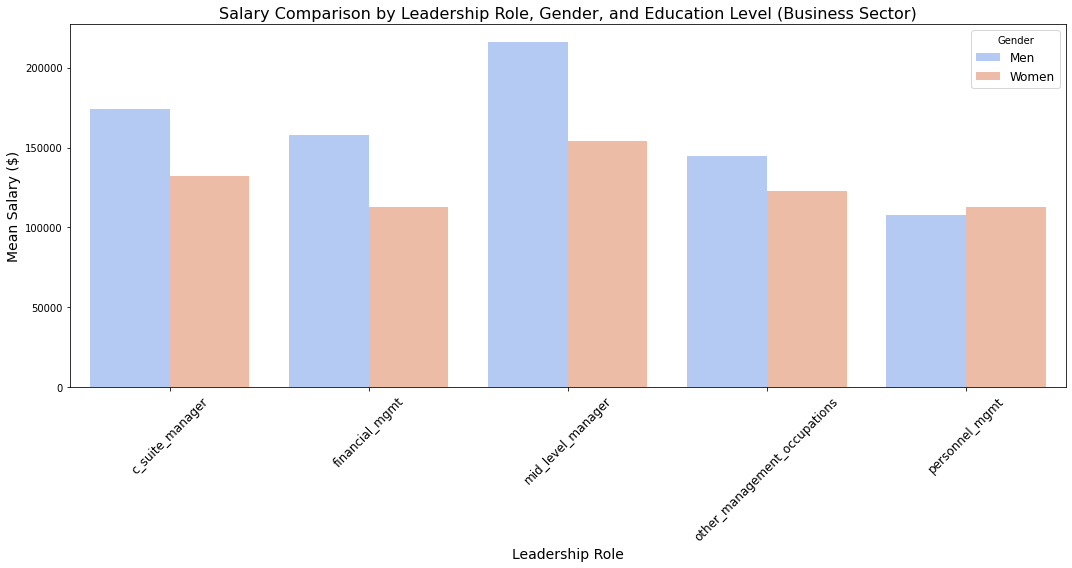

In [ ]:
# Melt data 
melted_all_education_data = business_salary_comparison_by_degree_sorted.melt(
    id_vars=['leadership_job_titles', 'highest_degree_type'], 
    value_vars=['mean_salary_men', 'mean_salary_women'], 
    var_name='Gender', 
    value_name='Mean Salary'
)

# Replace gender column values
melted_all_education_data['Gender'] = melted_all_education_data['Gender'].replace({
    'mean_salary_men': 'Men', 
    'mean_salary_women': 'Women'
})

# Create a grouped bar plot
plt.figure(figsize=(15, 8))

sns.barplot(
    data=melted_all_education_data, 
    x='leadership_job_titles', 
    y='Mean Salary', 
    hue='Gender', 
    palette='coolwarm',
    ci=None
)

# Customize plot
plt.title("Salary Comparison by Leadership Role, Gender, and Education Level (Business Sector)", fontsize=16)
plt.ylabel("Mean Salary ($)", fontsize=14)
plt.xlabel("Leadership Role", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Gender', fontsize=12)
plt.tight_layout()

# Display plot
plt.show()

The bar chart above compares the average salaries of men and women across various leadership roles in the business sector, segmented by education level. Men consistently earn more than women in all leadership roles, with the largest disparities observed in C-suite management and mid-level management positions. These results emphasize the persistent wage gap in leadership roles, even among highly educated professionals in the business sector.



## Salary Comparison for Leadership Roles by Bachelor's Degree within The Business Sector



hex_cell_2fd9f6ea-a416-4044-a929-835f68e3704a.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


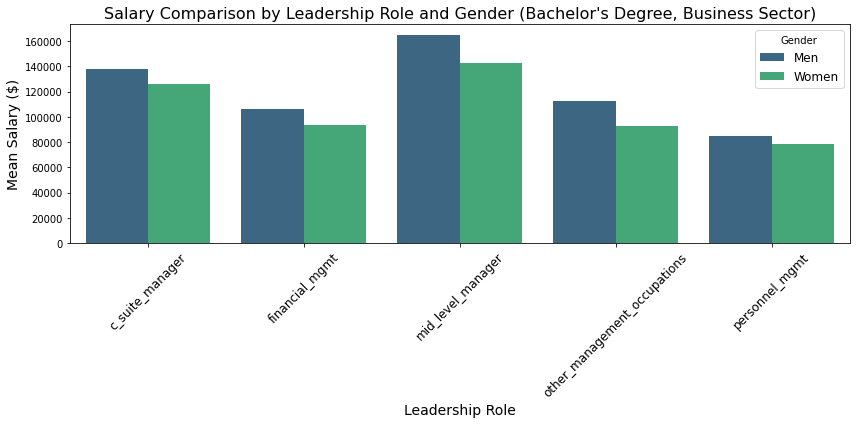

In [ ]:
# Filter data for Bachelor's degree
bachelors_data = business_salary_comparison_by_degree_sorted[
    business_salary_comparison_by_degree_sorted['highest_degree_type'] == 'Bachelors'
]

# Melt data
melted_bachelors_data = bachelors_data.melt(
    id_vars=['leadership_job_titles'], 
    value_vars=['mean_salary_men', 'mean_salary_women'], 
    var_name='Gender', 
    value_name='Mean Salary'
)

# Replace gender column values
melted_bachelors_data['Gender'] = melted_bachelors_data['Gender'].replace({
    'mean_salary_men': 'Men', 
    'mean_salary_women': 'Women'
})

# Create grouped bar plot
plt.figure(figsize=(12, 6))

sns.barplot(
    data=melted_bachelors_data, 
    x='leadership_job_titles', 
    y='Mean Salary', 
    hue='Gender', 
    palette='viridis',
    ci=None
)

# Customize plot
plt.title("Salary Comparison by Leadership Role and Gender (Bachelor's Degree, Business Sector)", fontsize=16)
plt.ylabel("Mean Salary ($)", fontsize=14)
plt.xlabel("Leadership Role", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Gender', fontsize=12)
plt.tight_layout()

# Display plot
plt.show()

The bar chart above compares the average salaries of men and women across leadership roles in the business sector for individuals holding a bachelor's degree. Men earn more than women in every leadership role, with the most significant disparities observed in mid-level management and financial management positions. These results highlight that gender-based wage gaps persist even among bachelor's degree holders in leadership roles.



## Salary Comparison for Leadership Roles by Doctorate Degree within The Business Sector



hex_cell_b1ab30b8-b80e-4ad0-ac1c-6ac0e3ad209e.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


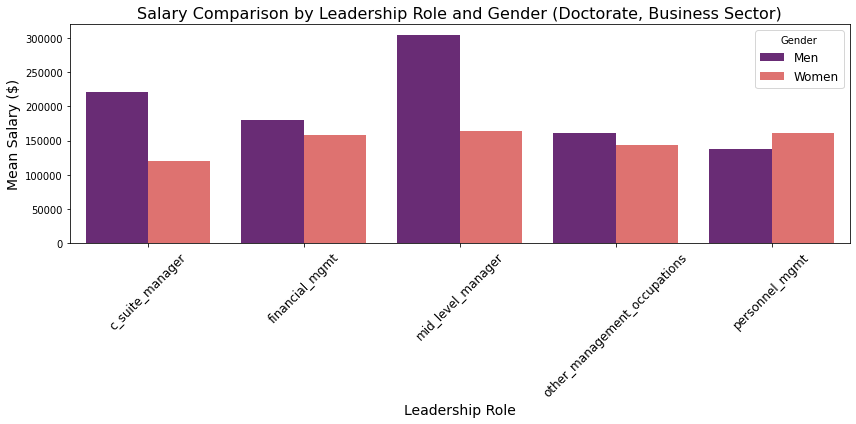

In [ ]:
# Filter data for Doctorate degree
doctorate_data = business_salary_comparison_by_degree_sorted[
    business_salary_comparison_by_degree_sorted['highest_degree_type'] == 'Doctorate'
]

# Melt data
melted_doctorate_data = doctorate_data.melt(
    id_vars=['leadership_job_titles'], 
    value_vars=['mean_salary_men', 'mean_salary_women'], 
    var_name='Gender', 
    value_name='Mean Salary'
)

# Replace gender column values for clarity
melted_doctorate_data['Gender'] = melted_doctorate_data['Gender'].replace({
    'mean_salary_men': 'Men', 
    'mean_salary_women': 'Women'
})

# Create grouped bar plot
plt.figure(figsize=(12, 6))

sns.barplot(
    data=melted_doctorate_data, 
    x='leadership_job_titles', 
    y='Mean Salary', 
    hue='Gender', 
    palette='magma',
    ci=None
)

# Customize the plot
plt.title("Salary Comparison by Leadership Role and Gender (Doctorate, Business Sector)", fontsize=16)
plt.ylabel("Mean Salary ($)", fontsize=14)
plt.xlabel("Leadership Role", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Gender', fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()

The bar chart above compares the average salaries of men and women across leadership roles in the business sector for individuals holding a doctorate degree. Men earn significantly more than women in most leadership roles, with the largest disparities observed in C-suite and mid-level management positions. These findings highlight persistent gender-based wage gaps in leadership roles, even among the most highly educated individuals.



## Salary Comparison for Leadership Roles by Master's Degree within The Business Sector



hex_cell_14736d99-71a0-44f7-978a-28a9d6ec1ab1.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


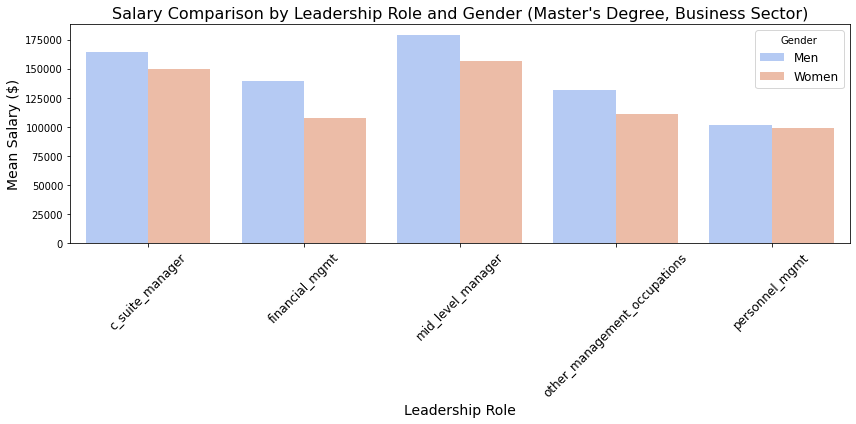

In [ ]:
# Filter data for Master's degree
masters_data = business_salary_comparison_by_degree_sorted[
    business_salary_comparison_by_degree_sorted['highest_degree_type'] == "Masters"
]

# Melt data
melted_masters_data = masters_data.melt(
    id_vars=['leadership_job_titles'], 
    value_vars=['mean_salary_men', 'mean_salary_women'], 
    var_name='Gender', 
    value_name='Mean Salary'
)

# Replace gender column values for clarity
melted_masters_data['Gender'] = melted_masters_data['Gender'].replace({
    'mean_salary_men': 'Men', 
    'mean_salary_women': 'Women'
})

# Create grouped bar plot
plt.figure(figsize=(12, 6))

sns.barplot(
    data=melted_masters_data, 
    x='leadership_job_titles', 
    y='Mean Salary', 
    hue='Gender', 
    palette='coolwarm',
    ci=None
)

# Customize the plot
plt.title("Salary Comparison by Leadership Role and Gender (Master's Degree, Business Sector)", fontsize=16)
plt.ylabel("Mean Salary ($)", fontsize=14)
plt.xlabel("Leadership Role", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Gender', fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()

The bar chart above compares the average salaries of men and women across leadership roles in the business sector for individuals holding a master’s degree. Men consistently earn more than women across most leadership roles, with the largest disparities observed in financial management and mid-level management positions. These findings emphasize that the wage gap persists even among master's degree holders in leadership positions within the business sector. 



## Salary Comparison for Leadership Roles by Professional Degree within The Business Sector



hex_cell_5f6272c0-3dbe-4c88-b86a-d22f85c73bfd.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


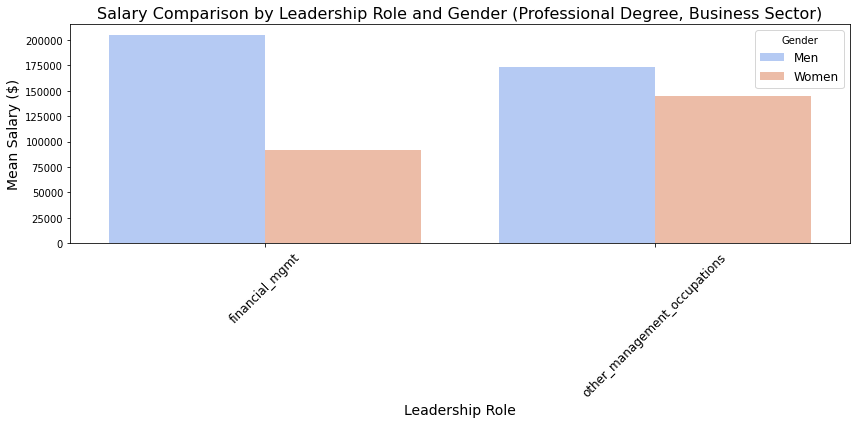

In [ ]:
# Filter data for Professional degree
professional_data = business_salary_comparison_by_degree_sorted[
    business_salary_comparison_by_degree_sorted['highest_degree_type'] == "Professional"
]

# Melt data
melted_professional_data = professional_data.melt(
    id_vars=['leadership_job_titles'], 
    value_vars=['mean_salary_men', 'mean_salary_women'], 
    var_name='Gender', 
    value_name='Mean Salary'
)

# Replace gender column values for clarity
melted_professional_data['Gender'] = melted_professional_data['Gender'].replace({
    'mean_salary_men': 'Men', 
    'mean_salary_women': 'Women'
})

# Create grouped bar plot
plt.figure(figsize=(12, 6))

sns.barplot(
    data=melted_professional_data, 
    x='leadership_job_titles', 
    y='Mean Salary', 
    hue='Gender', 
    palette='coolwarm',
    ci=None
)

# Customize the plot
plt.title("Salary Comparison by Leadership Role and Gender (Professional Degree, Business Sector)", fontsize=16)
plt.ylabel("Mean Salary ($)", fontsize=14)
plt.xlabel("Leadership Role", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Gender', fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()

The bar chart above compares the average salaries of men and women in leadership roles in the business sector for individuals holding a professional degree. Men earn significantly more than women in financial management, with a notable wage gap also observed in other management occupations. These results highlight persistent gender-based salary disparities in leadership roles, even among those with advanced professional qualifications. 



### Dataframe



In [ ]:
data

,salary,wkswk,earn,supwk,wamgmt,emsmi,gender,white,racethm,resploc,...,chlvin,partnered_with_children,lfstat,resplcus,private_corp,c_suite_managers,is_leadership,leadership_roles,leadership_job_codes,leadership_job_titles
0,60000,52,43000.0,0.0,1.0,same_employer_different_job,1,0,black,east_south_central,...,1,1,1,1,0.0,0.0,1,1.0,other_management_occupations,other_management_occupations
1,60000,52,60000.0,0.0,1.0,same_employer_same_job,1,0,black,west_south_central,...,1,1,1,1,0.0,0.0,1,1.0,other_management_occupations,other_management_occupations
2,90000,52,90000.0,0.0,0.0,same_employer_same_job,0,0,asian,mountain,...,1,1,1,1,1.0,0.0,0,0.0,NaN,Non-leadership
3,80000,52,80000.0,0.0,0.0,same_employer_same_job,1,1,white,mountain,...,1,0,1,1,0.0,0.0,0,0.0,NaN,Non-leadership
4,80000,52,80000.0,0.0,0.0,same_employer_same_job,1,1,white,mountain,...,0,0,1,1,0.0,0.0,0,0.0,NaN,Non-leadership
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58202,85000,52,85000.0,1.0,1.0,same_employer_different_job,0,1,white,east_north_central,...,0,0,1,1,1.0,0.0,0,0.0,NaN,Non-leadership
58203,115100,52,109229.0,1.0,0.0,same_employer_same_job,0,0,asian,east_north_central,...,1,1,1,1,1.0,0.0,0,0.0,NaN,Non-leadership
58204,110600,52,104267.0,0.0,0.0,same_employer_same_job,1,0,asian,east_north_central,...,1,1,1,1,1.0,0.0,0,0.0,NaN,Non-leadership
58205,24000,52,24000.0,1.0,1.0,same_employer_same_job,0,0,asian,mountain,...,0,0,1,1,0.0,0.0,0,0.0,NaN,Non-leadership


### Hypothesis 1: Women in the business sector have lower salaries than men in the business sector.



In [ ]:
# Copying the dataframe for my regression analysis 
hypothesis1_data = data.copy()
hypothesis1_data.columns

Index(['salary', 'wkswk', 'earn', 'supwk', 'wamgmt', 'emsmi', 'gender',
       'white', 'racethm', 'resploc', 'ctzusin', 'refyr', 'biryr', 'agegr',
       'strtyr', 'prmbr', 'promtgi', 'wktrni', 'hrswk', 'n2ocprbg',
       'occupation_group', 'n3ocpr', 'principal_job', 'wapri', 'wasec',
       'newbus', 'employer_type', 'sector', 'emsize', 'emsize_midpoint',
       'emrg', 'emst', 'jobsatis', 'wkslyr', 'years_at_job', 'fiftytwo_wksyr',
       'years_since_highest_degree', 'years_since_most_recent_degree',
       'years_since_first_ba', 'bsdgn', 'bayr', 'baind', 'hdcarn', 'n2dgrmed',
       'ndgmebg', 'highest_degree_field', 'highest_general_degree_field',
       'ndgmeng', 'highest_degree_type', 'spnat', 'spot', 'spsoc',
       'partner_work', 'marind', 'marsta', 'chlvin', 'partnered_with_children',
       'lfstat', 'resplcus', 'private_corp', 'c_suite_managers',
       'is_leadership', 'leadership_roles', 'leadership_job_codes',
       'leadership_job_titles'],
      dtype='object')

In [ ]:
hypothesis1_data = hypothesis1_data[['salary', 'gender', 'sector', 'years_at_job', 'highest_degree_type', 'partnered_with_children', 'wktrni' ]].copy()
# Removing duplicates 
hypothesis1_data.drop_duplicates(inplace=True)
# Look at data
hypothesis1_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39533 entries, 0 to 58206
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   salary                   39533 non-null  int32  
 1   gender                   39533 non-null  int32  
 2   sector                   39533 non-null  object 
 3   years_at_job             39533 non-null  int32  
 4   highest_degree_type      39533 non-null  object 
 5   partnered_with_children  39533 non-null  int32  
 6   wktrni                   39533 non-null  float64
dtypes: float64(1), int32(4), object(2)
memory usage: 1.8+ MB


In [ ]:
hypothesis1_data

,salary,gender,sector,years_at_job,highest_degree_type,partnered_with_children,wktrni
0,60000,1,educational_institutution,0,Masters,1,1.0
1,60000,1,government,5,Masters,1,1.0
2,90000,0,business,5,Bachelors,1,0.0
3,80000,1,educational_institutution,7,Bachelors,0,0.0
4,80000,1,government,14,Bachelors,0,1.0
...,...,...,...,...,...,...,...
58198,115000,0,business,25,Masters,0,0.0
58199,87000,0,business,5,Bachelors,1,0.0
58203,115100,0,business,6,Masters,1,0.0
58204,110600,1,business,6,Masters,1,0.0


In [ ]:
import numpy as np

# Add log transformed salary to dataset
hypothesis1_data['log_salary'] = np.log(hypothesis1_data['salary'])

#### Regression 1: log_salary ~ gender (no controls)



Weighted Least Squares Model Summary:
                            WLS Regression Results                            
Dep. Variable:             log_salary   R-squared:                       0.992
Model:                            WLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 3.694e+06
Date:                Tue, 17 Dec 2024   Prob (F-statistic):               0.00
Time:                        00:41:22   Log-Likelihood:                -3340.8
No. Observations:               31626   AIC:                             6686.
Df Residuals:                   31624   BIC:                             6702.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         

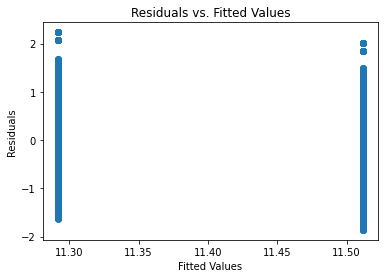

Model Summary with Robust Standard Errors:
                            WLS Regression Results                            
Dep. Variable:             log_salary   R-squared:                       0.992
Model:                            WLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 2.431e+04
Date:                Tue, 17 Dec 2024   Prob (F-statistic):               0.00
Time:                        00:41:22   Log-Likelihood:                -3340.8
No. Observations:               31626   AIC:                             6686.
Df Residuals:                   31624   BIC:                             6702.
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.regression.linear_model import WLS

# subset data
hypothesis1_data_reg1 = hypothesis1_data[["gender", "log_salary"]].copy()
# Split the data into training and testing sets for cross-validation
X = hypothesis1_data_reg1.drop(["log_salary"], axis=1)
y = hypothesis1_data_reg1["log_salary"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Build a linear regression model with Weighted Least Squares (WLS)
# Create weights based on the inverse of the variance of the residuals
model_ols = sm.OLS(y_train, sm.add_constant(X_train)).fit()
residuals = model_ols.resid
weights = 1 / (residuals**2)

# Fit the WLS model
model_wls_1 = WLS(y_train, sm.add_constant(X_train), weights=weights).fit()

print("Weighted Least Squares Model Summary:")
print(model_wls_1.summary())

# Evaluate model performance using cross-validation
model = LinearRegression()
cv_scores = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
mean_cv_score = -np.mean(cv_scores)
print(f"Cross-Validated Mean Squared Error: {mean_cv_score}")


plt.scatter(model_wls_1.fittedvalues, model_wls_1.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()

model_robust_1 = model_wls_1.get_robustcov_results(cov_type="HC3")
print("Model Summary with Robust Standard Errors:")
print(model_robust_1.summary())

y_pred = model_wls_1.predict(sm.add_constant(X_test))
test_mse = mean_squared_error(y_test, y_pred)
print(f"Test Mean Squared Error: {test_mse}")

In [ ]:
# Exponentiating coefficients for easier interpretation
coefficients = model_wls_1.params

# Exponentiate the coefficients
exp_coefficients = np.exp(coefficients)

# Display the exponentiated coefficients
print("Exponentiated Coefficients (interpreted as percentage change):")
print(exp_coefficients)

Exponentiated Coefficients (interpreted as percentage change):
const     99850.784290
gender        0.803001
dtype: float64


#### Regression 1 Summary:

Regressing log transformed salary on gender results in a statistically significant result. The exponentiated coefficient is 0.80, a value that means for women (relative to men), there is a predicted salary that is approximately 80% (a -20% difference) of the salary for men. This model contains no control variables, so it does not account for differences in education, sector, or family dynamics. In order to understand the differences between men and women's salaries within the business center, it is important to introduce control variables. While this result is statistically significant at the 5% level, the model likely over emphasizes the effect of gender on salary because there is omitted variable bias. In the next section, I will introduce control variables to the model to combat the OVB and get a better understanding of the factors that affect women's salaries compared to mens'.



#### Regression 2: log_salary ~ gender + controls



In [ ]:
# looking at columns to add controls 
hypothesis1_data_reg2 = hypothesis1_data.copy()
hypothesis1_data_reg2

,salary,gender,sector,years_at_job,highest_degree_type,partnered_with_children,wktrni,log_salary
0,60000,1,educational_institutution,0,Masters,1,1.0,11.002100
1,60000,1,government,5,Masters,1,1.0,11.002100
2,90000,0,business,5,Bachelors,1,0.0,11.407565
3,80000,1,educational_institutution,7,Bachelors,0,0.0,11.289782
4,80000,1,government,14,Bachelors,0,1.0,11.289782
...,...,...,...,...,...,...,...,...
58198,115000,0,business,25,Masters,0,0.0,11.652687
58199,87000,0,business,5,Bachelors,1,0.0,11.373663
58203,115100,0,business,6,Masters,1,0.0,11.653557
58204,110600,1,business,6,Masters,1,0.0,11.613675


In [ ]:
# encode categorical variables 
categorical_columns = ['highest_degree_type']
hypothesis1_data_reg2 = pd.get_dummies(hypothesis1_data_reg2, columns=categorical_columns, drop_first=True)

# encode sector as a binary variable (1 = business sector)
hypothesis1_data_reg2['business_sector'] = (hypothesis1_data_reg2['sector'] == 'business').astype(int)
hypothesis1_data_reg2.drop("sector", axis=1, inplace=True)
hypothesis1_data_reg2

,salary,gender,years_at_job,partnered_with_children,wktrni,log_salary,highest_degree_type_Doctorate,highest_degree_type_Masters,highest_degree_type_Professional,business_sector
0,60000,1,0,1,1.0,11.002100,0,1,0,0
1,60000,1,5,1,1.0,11.002100,0,1,0,0
2,90000,0,5,1,0.0,11.407565,0,0,0,1
3,80000,1,7,0,0.0,11.289782,0,0,0,0
4,80000,1,14,0,1.0,11.289782,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
58198,115000,0,25,0,0.0,11.652687,0,1,0,1
58199,87000,0,5,1,0.0,11.373663,0,0,0,1
58203,115100,0,6,1,0.0,11.653557,0,1,0,1
58204,110600,1,6,1,0.0,11.613675,0,1,0,1


In [ ]:
# Step 1: Check for multicollinearity using Variance Inflation Factor (VIF)
X = hypothesis1_data_reg2.drop(['salary', 'log_salary'], axis=1)
X = sm.add_constant(X) # Adding a constant column for VIF calculation

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print("Variance Inflation Factors:")
print(vif_data)

Variance Inflation Factors:
                           Variable       VIF
0                             const  8.659444
1                            gender  1.031596
2                      years_at_job  1.022139
3           partnered_with_children  1.010690
4                            wktrni  1.037789
5     highest_degree_type_Doctorate  1.111784
6       highest_degree_type_Masters  1.131607
7  highest_degree_type_Professional  1.046389
8                   business_sector  1.059194


Weighted Least Squares Model Summary:
                            WLS Regression Results                            
Dep. Variable:             log_salary   R-squared:                       1.000
Model:                            WLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.337e+07
Date:                Mon, 16 Dec 2024   Prob (F-statistic):               0.00
Time:                        07:18:41   Log-Likelihood:                -1146.9
No. Observations:               31626   AIC:                             2312.
Df Residuals:                   31617   BIC:                             2387.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

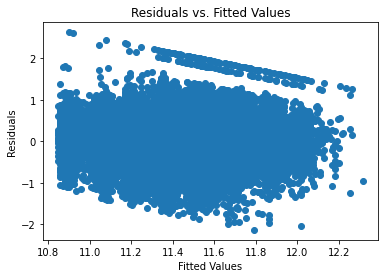

Model Summary with Robust Standard Errors:
                            WLS Regression Results                            
Dep. Variable:             log_salary   R-squared:                       1.000
Model:                            WLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.231e+07
Date:                Mon, 16 Dec 2024   Prob (F-statistic):               0.00
Time:                        07:18:41   Log-Likelihood:                -1146.9
No. Observations:               31626   AIC:                             2312.
Df Residuals:                   31617   BIC:                             2387.
Df Model:                           8                                         
Covariance Type:                  HC3                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

In [ ]:
# Split the data into training and testing sets for cross-validation
X = hypothesis1_data_reg2.drop(['log_salary', 'salary'], axis=1)
y = hypothesis1_data_reg2['log_salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a linear regression model with Weighted Least Squares (WLS)
# Create weights based on the inverse of the variance of the residuals
model_ols_2 = sm.OLS(y_train, sm.add_constant(X_train)).fit()
residuals = model_ols_2.resid
weights = 1 / (residuals ** 2)

# Fit the WLS model
model_wls_2 = WLS(y_train, sm.add_constant(X_train), weights=weights).fit()

print("Weighted Least Squares Model Summary:")
print(model_wls_2.summary())

# Evaluate model performance using cross-validation
model = LinearRegression()
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
mean_cv_score = -np.mean(cv_scores)
print(f"Cross-Validated Mean Squared Error: {mean_cv_score}")

plt.scatter(model_wls_2.fittedvalues, model_wls_2.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

model_robust = model_wls_2.get_robustcov_results(cov_type='HC3')
print("Model Summary with Robust Standard Errors:")
print(model_robust.summary())

y_pred = model_wls_2.predict(sm.add_constant(X_test))
test_mse = mean_squared_error(y_test, y_pred)
print(f"Test Mean Squared Error: {test_mse}")

In [ ]:
# Exponentiating coefficients for easier interpretation
coefficients = model_wls_2.params

# Exponentiate the coefficients
exp_coefficients = np.exp(coefficients)

# Display the exponentiated coefficients
print("Exponentiated Coefficients (interpreted as percentage change):")
print(exp_coefficients)

Exponentiated Coefficients (interpreted as percentage change):
const                               61041.667849
gender                                  0.842733
years_at_job                            1.010527
partnered_with_children                 1.147715
wktrni                                  1.024841
highest_degree_type_Doctorate           1.453216
highest_degree_type_Masters             1.190065
highest_degree_type_Professional        1.649586
business_sector                         1.365798
dtype: float64


#### Regression 2 Summary:

This regression model provides a clearer picture of wage differentials by gender. To investigate our hypothesis specifically about the business sector, I created a binary variable that equals '1' for observations within the business sector and '0' for other sectors. I also added the following variables to the model: `years_at_job`, `partnered_with_children`, `wktrni`, and `highest_degree_type`. `years_at_job` controls for factors like age, and time spent in the workforce. `wktrni` is a proxy to control for professional development, and `highest_degree_type` controls for level of education. Lastly, `partnered_with_children` controls for differing family dynamics. 

I checked for multicollinearity using variance inflation factor (VIF), which measures how much the variance of a regression coefficient increases due to correlations between predictors. All of the predictor variables had VIF values less than 5, indicating low correlation between predictor variables. Low VIF is important for isolating the effect of each predictor. The coefficients on each predictor tell us how each predictor affects the target variable, which, in this case is log transformed salary.

Interpreting coefficients:

- **gender:**, the exponentiated coefficient on gender is 0.84. This means that for women (relative to men), there is a predicted salary that is approximately 84% of the salary for men, after controlling for other variables.
- **years_at_job:**, the coefficient on years_at_job indicates a small (1%), but statistically significant, increase on salary for longer time at a job.
- **partnered_with_children: **,the coefficient on partnered_with_children indicates that people who have a partner and kids have higher salaries (~14%) compared to individuals who are not partnered with kids.
- **wktrni: **,the coefficient on work training indicates small, positive returns on professional development (~2.5%). \
- **highest_degree_type: **,the coefficients on the degree type variables show that more schooling leads to higher salaries, and vary by the degree type. 
- **business_sector: **,the coefficient on the binary business sector variable means that people who work in the business sector have salaries that are 1.36% larger compared to people in other sectors. 

All of these results are statistically significant at the 5% level. 

Adding these control variables to the model decreased the effect of gender on salary, proving that there was omitted variable bias in the first model I ran, so the coefficient in that model over inflated the effect of gender on salary. This model shows that salaries decrease for women, but increase when a person works in the business sector. In order to test our hypothesis, I need to create an interaction term by multiplying the two binary variables, gender and  business_sector. The coefficient on this term will help me understand the additional effect on salary for women who 
are also in the business sector, over and above the separate effects of being female and working in the business sector.



#### Regression 3: log_salary ~ gender + controls + interaction term 



In [ ]:
hypothesis1_data_reg3 = hypothesis1_data_reg2.copy()
hypothesis1_data_reg3['women_in_business'] = hypothesis1_data_reg3['gender']*hypothesis1_data_reg3['business_sector']
hypothesis1_data_reg3

,salary,gender,years_at_job,partnered_with_children,wktrni,log_salary,highest_degree_type_Doctorate,highest_degree_type_Masters,highest_degree_type_Professional,business_sector,women_in_business
0,60000,1,0,1,1.0,11.002100,0,1,0,0,0
1,60000,1,5,1,1.0,11.002100,0,1,0,0,0
2,90000,0,5,1,0.0,11.407565,0,0,0,1,0
3,80000,1,7,0,0.0,11.289782,0,0,0,0,0
4,80000,1,14,0,1.0,11.289782,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
58198,115000,0,25,0,0.0,11.652687,0,1,0,1,0
58199,87000,0,5,1,0.0,11.373663,0,0,0,1,0
58203,115100,0,6,1,0.0,11.653557,0,1,0,1,0
58204,110600,1,6,1,0.0,11.613675,0,1,0,1,1


Weighted Least Squares Model Summary:
                            WLS Regression Results                            
Dep. Variable:             log_salary   R-squared:                       1.000
Model:                            WLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.536e+07
Date:                Mon, 16 Dec 2024   Prob (F-statistic):               0.00
Time:                        07:18:42   Log-Likelihood:                -1167.6
No. Observations:               31626   AIC:                             2355.
Df Residuals:                   31616   BIC:                             2439.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

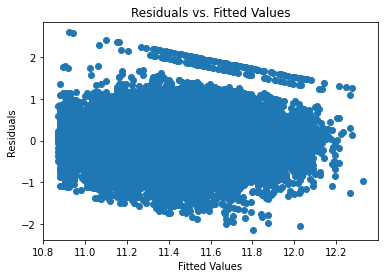

Model Summary with Robust Standard Errors:
                            WLS Regression Results                            
Dep. Variable:             log_salary   R-squared:                       1.000
Model:                            WLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.426e+07
Date:                Mon, 16 Dec 2024   Prob (F-statistic):               0.00
Time:                        07:18:42   Log-Likelihood:                -1167.6
No. Observations:               31626   AIC:                             2355.
Df Residuals:                   31616   BIC:                             2439.
Df Model:                           9                                         
Covariance Type:                  HC3                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

In [ ]:
# Split the data into training and testing sets for cross-validation
X = hypothesis1_data_reg3.drop(['log_salary', 'salary'], axis=1)
y = hypothesis1_data_reg3['log_salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a linear regression model with Weighted Least Squares (WLS)
# Create weights based on the inverse of the variance of the residuals
model_ols = sm.OLS(y_train, sm.add_constant(X_train)).fit()
residuals = model_ols.resid
weights = 1 / (residuals ** 2)

# Fit the WLS model
model_wls = WLS(y_train, sm.add_constant(X_train), weights=weights).fit()

print("Weighted Least Squares Model Summary:")
print(model_wls.summary())

# Evaluate model performance using cross-validation
model = LinearRegression()
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
mean_cv_score = -np.mean(cv_scores)
print(f"Cross-Validated Mean Squared Error: {mean_cv_score}")

plt.scatter(model_wls.fittedvalues, model_wls.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

model_robust = model_wls.get_robustcov_results(cov_type='HC3')
print("Model Summary with Robust Standard Errors:")
print(model_robust.summary())

y_pred = model_wls.predict(sm.add_constant(X_test))
test_mse = mean_squared_error(y_test, y_pred)
print(f"Test Mean Squared Error: {test_mse}")

In [ ]:
# Exponentiating coefficients for easier interpretation
coefficients = model_wls.params

# Exponentiate the coefficients
exp_coefficients = np.exp(coefficients)

# Display the exponentiated coefficients
print("Exponentiated Coefficients (interpreted as percentage change):")
print(exp_coefficients)

Exponentiated Coefficients (interpreted as percentage change):
const                               59737.883760
gender                                  0.881759
years_at_job                            1.010513
partnered_with_children                 1.147072
wktrni                                  1.024420
highest_degree_type_Doctorate           1.454735
highest_degree_type_Masters             1.189061
highest_degree_type_Professional        1.650761
business_sector                         1.412703
women_in_business                       0.927535
dtype: float64


#### Regression 3 Summary :

The interaction between gender and business sector accounts for the additional effect on salary of being a woman in the business sector, on top of the individual effects of working in the business sector and gender. An exponentiated value of 0.92 suggests that, for women who work in the business sector, the salary is approximately 7.2% lower than it would be based on the main effects of gender and sector alone.  

- The percentages change is calculated as: ((0.927535-1)*100) = 7.2%

**Individual effects:**

- Working,** in the business sector: **,the coefficient on ,`business_sector`, indicates that people who work in the business sector have predicted salaries of 1.41% larger than those in other sectors. 
- **effect of gender: **,the coefficient on gender indicates that women, in general, earn 12.58% less than men.

**Interaction term:**

- the interaction term (gender*business_sector) further reduces the salary by an additional 7.2% for women who work in the business sector.

Therefore, women who work in the business sector see a salary that is 7.2% lower than would be predicted by the main effects of gender and working in the business sector combined. It is important to note that this does not mean they earn 7.2% less relative to men directly, but it reflects a smaller salary boost for women in the business sector compared to men in the same category. 

All of these results are statistically significant at the 5% level.



#### Hypothesis 1 Summary:

Ultimately, the coefficient of interest, on the interaction between gender and belonging to the business sector, shows that women in the business sector make less than men in the business sector. We know that the overall effect of working in the business sector leads to a positive increase in salary for both men and women, but women do not benefit as much as men do from this salary boost. Therefore, we reject the null hypothesis that women _do not_ have _significantly_ lower salaries than men within the business sector. 



### Hypothesis 2: Women in leadership roles have_ _lower salaries than men in leadership roles within the business sector 



In [ ]:
# creating a copy of the dataframe to use for analysis
hyp2 = data.copy()
hyp2.drop_duplicates(inplace=True)
hyp2.columns

Index(['salary', 'wkswk', 'earn', 'supwk', 'wamgmt', 'emsmi', 'gender',
       'white', 'racethm', 'resploc', 'ctzusin', 'refyr', 'biryr', 'agegr',
       'strtyr', 'prmbr', 'promtgi', 'wktrni', 'hrswk', 'n2ocprbg',
       'occupation_group', 'n3ocpr', 'principal_job', 'wapri', 'wasec',
       'newbus', 'employer_type', 'sector', 'emsize', 'emsize_midpoint',
       'emrg', 'emst', 'jobsatis', 'wkslyr', 'years_at_job', 'fiftytwo_wksyr',
       'years_since_highest_degree', 'years_since_most_recent_degree',
       'years_since_first_ba', 'bsdgn', 'bayr', 'baind', 'hdcarn', 'n2dgrmed',
       'ndgmebg', 'highest_degree_field', 'highest_general_degree_field',
       'ndgmeng', 'highest_degree_type', 'spnat', 'spot', 'spsoc',
       'partner_work', 'marind', 'marsta', 'chlvin', 'partnered_with_children',
       'lfstat', 'resplcus', 'private_corp', 'c_suite_managers',
       'is_leadership', 'leadership_roles', 'leadership_job_codes',
       'leadership_job_titles'],
      dtype='object')

#### log_salary ~ gender

_no controls_

- `log_salary`
  - log-transformed salary will allow clearer and more meaningful interpretation of gender wage gap, ensuring findings are not biased by extreme salary values
  - stabilizes variance
- `gender`
  - males are the reference group in each model



Variance Inflation Factors:
  Variable       VIF
0    const  1.696008
1   gender  1.000000
Cross-Validated Mean Squared Error: 0.26649315039458993


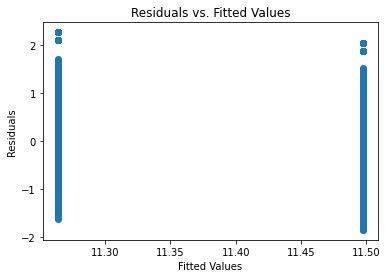

Model Summary with Robust Standard Errors:
                            WLS Regression Results                            
Dep. Variable:             log_salary   R-squared:                       0.997
Model:                            WLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 4.212e+05
Date:                Tue, 17 Dec 2024   Prob (F-statistic):               0.00
Time:                        00:19:48   Log-Likelihood:                -3176.1
No. Observations:               46565   AIC:                             6356.
Df Residuals:                   46563   BIC:                             6374.
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

In [ ]:
df = hyp2[['salary', 'gender']]

df_encoded = pd.get_dummies(df, drop_first=True)

# Log-transform the salary to stabilize variance
df_encoded['log_salary'] = np.log(df_encoded['salary'])  # choose salary or earnings

# Step 1: Check for multicollinearity using Variance Inflation Factor (VIF)
X = df_encoded.drop(['salary', 'log_salary'], axis=1)
X = sm.add_constant(X)  # Adding a constant column for VIF calculation

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print('Variance Inflation Factors:')
print(vif_data)

# Drop variables with high VIF values (>5 or >10)
# Drop variables with high VIF values (>5 or >10)
# Example: df_encoded.drop(columns=['high_vif_variable'], inplace=True)
# Uncomment and replace 'high_vif_variable' with actual variable name if needed

# Split the data into training and testing sets for cross-validation
X = df_encoded.drop(['salary', 'log_salary'], axis=1)
y = df_encoded['log_salary']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Build a linear regression model with Weighted Least Squares (WLS)
# Create weights based on the inverse of the variance of the residuals
model_ols = sm.OLS(y_train, sm.add_constant(X_train)).fit()
residuals = model_ols.resid
weights = 1 / (residuals**2)

# Fit the WLS model
model_wls = WLS(y_train, sm.add_constant(X_train), weights=weights).fit()

# Evaluate model performance using cross-validation
model = LinearRegression()
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
mean_cv_score = -np.mean(cv_scores)
print(f'Cross-Validated Mean Squared Error: {mean_cv_score}')

plt.scatter(model_wls.fittedvalues, model_wls.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

model_robust = model_wls.get_robustcov_results(cov_type='HC3')
print('Model Summary with Robust Standard Errors:')
print(model_robust.summary())

y_pred = model_wls.predict(sm.add_constant(X_test))
test_mse = mean_squared_error(y_test, y_pred)
print(f'Test Mean Squared Error: {test_mse}')

**Results:** Our base model shows that women have a 23.3% lower log_salary compared to men. This is statistically significant confirming that `gender` has a strong negative association with `salary`.



#### log_salary ~ gender * leadership_job_titles + control

- `log_salary`
- `gender * leadership_job_titles`
  - specifically examines the gender wage gap within leadership positions
  - tests if the effect of leadership on salary differs by gender
- control
  - `sector == business`



In [ ]:
hyp2['leadership_job_titles'].unique()

array(['other_management_occupations', 'Non-leadership', 'financial_mgmt',
       'c_suite_manager', 'personnel_mgmt', 'mid_level_manager'],
      dtype=object)

Variance Inflation Factors:
                                             Variable       VIF
0                                               const  1.882757
1                                              gender  1.228731
2               leadership_job_titles_c_suite_manager  1.213600
3                leadership_job_titles_financial_mgmt  1.897218
4             leadership_job_titles_mid_level_manager  1.345220
5   leadership_job_titles_other_management_occupat...  1.861122
6                leadership_job_titles_personnel_mgmt  3.274994
7        gender_leadership_job_titles_c_suite_manager  1.214341
8         gender_leadership_job_titles_financial_mgmt  1.964582
9      gender_leadership_job_titles_mid_level_manager  1.349705
10  gender_leadership_job_titles_other_management_...  1.999213
11        gender_leadership_job_titles_personnel_mgmt  3.314470
Cross-Validated Mean Squared Error: 0.25917589314487893


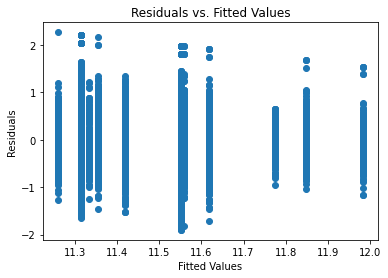

Model Summary with Robust Standard Errors:
                            WLS Regression Results                            
Dep. Variable:             log_salary   R-squared:                       0.995
Model:                            WLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 8.324e+06
Date:                Tue, 17 Dec 2024   Prob (F-statistic):               0.00
Time:                        00:36:13   Log-Likelihood:                -1204.7
No. Observations:               32644   AIC:                             2433.
Df Residuals:                   32632   BIC:                             2534.
Df Model:                          11                                         
Covariance Type:                  HC3                                         
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
# Encoding categorical variables
df = hyp2[['salary', 'gender', 'leadership_job_titles']].loc[
    (hyp2['sector'] == 'business')
]

columns_to_encode = ['leadership_job_titles']
df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

# Log-transform the salary to stabilize variance
df_encoded['log_salary'] = np.log(df_encoded['salary'])

# Create interaction terms
interactionterm = df_encoded.filter(like='leadership_job_titles_').multiply(df_encoded['gender'], axis=0)
interactionterm.columns = [f"gender_{col}" for col in interactionterm.columns]

# Add interaction terms to the dataset
df_encoded = pd.concat([df_encoded, interactionterm], axis=1)

# Check for multicollinearity using Variance Inflation Factor (VIF)
X = df_encoded.drop(['salary', 'log_salary'], axis=1)
X = sm.add_constant(X)  # Adding a constant column for VIF calculation

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print('Variance Inflation Factors:')
print(vif_data)

# Step 3: Split the data into training and testing sets
X = df_encoded.drop(['salary', 'log_salary'], axis=1)
y = df_encoded['log_salary']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 4: Build a linear regression model with Weighted Least Squares (WLS)
# Create weights based on the inverse of the variance of the residuals
model_ols = sm.OLS(y_train, sm.add_constant(X_train)).fit()
residuals = model_ols.resid
weights = 1 / (residuals**2)

# Fit the WLS model with interaction terms
model_wls = WLS(y_train, sm.add_constant(X_train), weights=weights).fit()


# Evaluate model performance using cross-validation
model = LinearRegression()
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
mean_cv_score = -np.mean(cv_scores)
print(f'Cross-Validated Mean Squared Error: {mean_cv_score}')

# Residual plot
plt.scatter(model_wls.fittedvalues, model_wls.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

# Robust standard errors
model_robust = model_wls.get_robustcov_results(cov_type='HC3')
print('Model Summary with Robust Standard Errors:')
print(model_robust.summary())

# Test set performance
y_pred = model_wls.predict(sm.add_constant(X_test))
test_mse = mean_squared_error(y_test, y_pred)
print(f'Test Mean Squared Error: {test_mse}')

**Results:** For gender, women have a significantly lower log_salary compared to men by approximately 23.7%, confirming a general gender wage gap. Women in leadership roles, specifically c-suite positions and personnel management experience a reduction in the gender pay gap, but despite improvements, women in leadership still earn less than men in equivalent roles as the gender coefficient remains negative and large. This suggests that while leadership positions may mitigate the gender wage gap, they do not eliminate them.



#### log_salary ~ gender * highest degree type + leadership_job_titles + control

- `log_salary`
- `gender * highest_degree_type`
  - examines the gender wage gap across education levels
  - tests whether the gender wage gap varies by both education level and leadership job title
- `leadership_job_titles`
- control
  - `sector == business`



Variance Inflation Factors:
                                             Variable       VIF
0                                               const  2.822147
1                                              gender  1.757990
2               leadership_job_titles_c_suite_manager  1.009950
3                leadership_job_titles_financial_mgmt  1.011900
4             leadership_job_titles_mid_level_manager  1.003099
5   leadership_job_titles_other_management_occupat...  1.015886
6                leadership_job_titles_personnel_mgmt  1.011465
7                       highest_degree_type_Doctorate  1.515268
8                         highest_degree_type_Masters  1.697515
9                    highest_degree_type_Professional  2.028065
10               gender_highest_degree_type_Doctorate  1.560575
11                 gender_highest_degree_type_Masters  2.290810
12            gender_highest_degree_type_Professional  2.075866
Cross-Validated Mean Squared Error: 0.23696939075778634


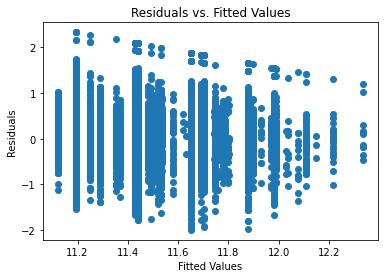

Model Summary with Robust Standard Errors:
                            WLS Regression Results                            
Dep. Variable:             log_salary   R-squared:                       0.995
Model:                            WLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.969e+05
Date:                Tue, 17 Dec 2024   Prob (F-statistic):               0.00
Time:                        01:32:04   Log-Likelihood:                 429.42
No. Observations:               32644   AIC:                            -832.8
Df Residuals:                   32631   BIC:                            -723.7
Df Model:                          12                                         
Covariance Type:                  HC3                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

In [ ]:
# Encoding categorical variables
df = hyp2[['salary', 'gender', 'leadership_job_titles', 'highest_degree_type']].loc[
    (hyp2['sector'] == 'business')
]

columns_to_encode = ['leadership_job_titles', 'highest_degree_type']
df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

# Log-transform the salary to stabilize variance
df_encoded['log_salary'] = np.log(df_encoded['salary'])

# Create interaction terms
interactionterm = df_encoded.filter(like='highest_degree_type').multiply(df_encoded['gender'], axis=0)
interactionterm.columns = [f"gender_{col}" for col in interactionterm.columns]

# Add interaction terms to the dataset
df_encoded = pd.concat([df_encoded, interactionterm], axis=1)

# Check for multicollinearity using Variance Inflation Factor (VIF)
X = df_encoded.drop(['salary', 'log_salary'], axis=1)
X = sm.add_constant(X)  # Adding a constant column for VIF calculation

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print('Variance Inflation Factors:')
print(vif_data)

# Step 3: Split the data into training and testing sets
X = df_encoded.drop(['salary', 'log_salary'], axis=1)
y = df_encoded['log_salary']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 4: Build a linear regression model with Weighted Least Squares (WLS)
# Create weights based on the inverse of the variance of the residuals
model_ols = sm.OLS(y_train, sm.add_constant(X_train)).fit()
residuals = model_ols.resid
weights = 1 / (residuals**2)

# Fit the WLS model with interaction terms
model_wls = WLS(y_train, sm.add_constant(X_train), weights=weights).fit()


# Evaluate model performance using cross-validation
model = LinearRegression()
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
mean_cv_score = -np.mean(cv_scores)
print(f'Cross-Validated Mean Squared Error: {mean_cv_score}')

# Residual plot
plt.scatter(model_wls.fittedvalues, model_wls.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

# Robust standard errors
model_robust = model_wls.get_robustcov_results(cov_type='HC3')
print('Model Summary with Robust Standard Errors:')
print(model_robust.summary())

# Test set performance
y_pred = model_wls.predict(sm.add_constant(X_test))
test_mse = mean_squared_error(y_test, y_pred)
print(f'Test Mean Squared Error: {test_mse}')

**Results:** Women with bachelor's degrees in the business sector earn approximately 24.43% less in log_salary compared to men with bachelor's degrees in the business sector. Leadership did significantly increase salaries, but women remain at a disadvantage overall. The interaction terms revealed that the gender wage gap varies by education level, for women with doctorate and master's degrees, the gender gap is smaller or even slightly reversed. For women with professional degrees, the gender wage gap worsens, suggesting a disadvantage at this education level. Gender remained a significant predictor of lower salaries for women. Education levels did interact with gender to partially mitigate the gender wage gap, but it did exacerbate it as well.



#### log_salary ~ gender * leadership_job_titles +  controls

- `log_salary`
- `gender`
- `leadership_job_titles`
- `years_at_job`
  - controls for work experience which is a critical factor for determining salary
- `wktrni`
  - control for work training and skill development, examining the gender wage gap in leadership roles and if they persist even when training opportunities exist
- `partnered_with_children`
  - control for family structure, examining family responsibilities which can influence earnings



Variance Inflation Factors:
                                             Variable       VIF
0                                               const  4.207676
1                                              gender  1.247654
2                                        years_at_job  1.018261
3                                              wktrni  1.006076
4                             partnered_with_children  1.021328
5               leadership_job_titles_c_suite_manager  1.217212
6                leadership_job_titles_financial_mgmt  1.898391
7             leadership_job_titles_mid_level_manager  1.347242
8   leadership_job_titles_other_management_occupat...  1.864039
9                leadership_job_titles_personnel_mgmt  3.277704
10       gender_leadership_job_titles_c_suite_manager  1.214506
11        gender_leadership_job_titles_financial_mgmt  1.966093
12     gender_leadership_job_titles_mid_level_manager  1.349876
13  gender_leadership_job_titles_other_management_...  1.999615
14        ge

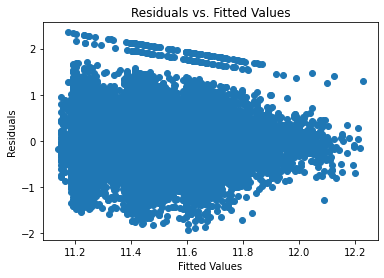

Model Summary with Robust Standard Errors:
                            WLS Regression Results                            
Dep. Variable:             log_salary   R-squared:                       1.000
Model:                            WLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.004e+05
Date:                Tue, 17 Dec 2024   Prob (F-statistic):               0.00
Time:                        03:47:24   Log-Likelihood:                -107.65
No. Observations:               32644   AIC:                             245.3
Df Residuals:                   32629   BIC:                             371.2
Df Model:                          14                                         
Covariance Type:                  HC3                                         
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
# Encoding categorical variables
df = hyp2[['salary', 'gender', 'leadership_job_titles', 'years_at_job', 'wktrni', 'partnered_with_children']].loc[
    (hyp2['sector'] == 'business')
]

columns_to_encode = ['leadership_job_titles']
df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

# Log-transform the salary to stabilize variance
df_encoded['log_salary'] = np.log(df_encoded['salary'])

# Create interaction terms
interactionterm = df_encoded.filter(like='leadership_job_titles').multiply(df_encoded['gender'], axis=0)
interactionterm.columns = [f"gender_{col}" for col in interactionterm.columns]

# Add interaction terms to the dataset
df_encoded = pd.concat([df_encoded, interactionterm], axis=1)

# Check for multicollinearity using Variance Inflation Factor (VIF)
X = df_encoded.drop(['salary', 'log_salary'], axis=1)
X = sm.add_constant(X)  # Adding a constant column for VIF calculation

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print('Variance Inflation Factors:')
print(vif_data)

# Step 3: Split the data into training and testing sets
X = df_encoded.drop(['salary', 'log_salary'], axis=1)
y = df_encoded['log_salary']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 4: Build a linear regression model with Weighted Least Squares (WLS)
# Create weights based on the inverse of the variance of the residuals
model_ols = sm.OLS(y_train, sm.add_constant(X_train)).fit()
residuals = model_ols.resid
weights = 1 / (residuals**2)

# Fit the WLS model with interaction terms
model_wls = WLS(y_train, sm.add_constant(X_train), weights=weights).fit()


# Evaluate model performance using cross-validation
model = LinearRegression()
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
mean_cv_score = -np.mean(cv_scores)
print(f'Cross-Validated Mean Squared Error: {mean_cv_score}')

# Residual plot
plt.scatter(model_wls.fittedvalues, model_wls.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

# Robust standard errors
model_robust = model_wls.get_robustcov_results(cov_type='HC3')
print('Model Summary with Robust Standard Errors:')
print(model_robust.summary())

# Test set performance
y_pred = model_wls.predict(sm.add_constant(X_test))
test_mse = mean_squared_error(y_test, y_pred)
print(f'Test Mean Squared Error: {test_mse}')

**Results:** Being female is associated with approximately 21.08% lower log_salary compared to men in the business sector, controlling for all other factors, aligning with the hypothesis that women experience a salary penalty. Leadership roles are generally strongly associated with higher salaries suggesting that leadership positions come with salary benefits overall, but the gender disparity persists even when accounting for these roles. Our interaction term for gender * leadership_job_titles reveals a positive interaction suggesting that while leadership roles help narrow the wage gap, they do not fully offset the baseline gender penalty of -21.08%. 

For years_at_job, each additional year of experience adds a 0.86% increase in salary. Participating in wktrni (work training) contributes a 3.92% increase to salary. Being partnered_with_children also adds a 19.06% increase, suggesting a positive family-status effect. 



#### Hypothesis 2 Summary

In all the models, there were negative gender coefficients confirming that women earn lower salaries overall in the business sector which is consistent with the hypothesis. The positive interaction terms between gender and leadership suggest that women in leadership positions experience smaller salary penalties compared to women in non-leadership roles. However, the baseline gender wage gap remains significant, indicating that even in leadership roles, women earn less than men. Additionally, not all leadership roles are equal. Across the models, the gender wage gap is only partially narrowed in roles like c-suite management and mid-level management. These results support the hypothesis that women in leadership roles have lower salaries than men in equivalent positions in the business sector. While leadership roles mitigate the gap to some extent, they do not eliminate it entirely. The baseline gender wage gap penalty remains significant, thus we reject the null hypothesis that women do not have _significantly _lower salaries than men in leadership roles within the business sector 



## Conclusion

Overall, we found that gendered disparities within the workplace persist in the business sector. The EDA displayed several insights into the makeup of the business sector work force and displays salary differentials between men and women. Women are underrepresented within the business sector (37% female), and have lower average salaries than men within the sector. We found that women dominate the educational institution sector, yet they are still paid less than men within each occupational group. Additionally, it does not seem that educational backgrounds are responsible for the salary differentials because men consistently earn more than women, even when we looked at specific degree types like Master's, doctorate, and professional; it did not matter if men and women help the same level of education, men consistently out-earned women. We moved on to looking at leadership roles. Again, men have higher salaries than women in leadership roles for all occupational groups, and for all levels of education. In conclusion, our EDA showed that men consistently have higher salaries than women, even if they work in the same sector, have the same occupational group, leadership role, or education level.   

To investigate our hypothesis specifically about the business sector, I created a binary variable that equals '1' for observations within the business sector and '0' for other sectors. Including this binary variable allows us to compare the business sector against all other sectors in the dataset. We control for the following variables: `years_at_job`, `partnered_with_children`, `wktrni`, and `highest_degree_type`. The interaction between gender and business_sector is the coefficient of interest, representing the effect of being a woman in the business sector. The negative coefficient (and p-value of less than 0.05) on this variable shows that women have statistically significantly lower salaries than men within the business sector. Hence, we reject the null hypothesis that women _do not_ have _significantly_ lower salaries than men within the business sector. 

To further our analysis, we subset the data to only look at dynamics within the business sector (not in comparison to other sectors). Specifically, hypothesis 2 focuses on salary differentials between men and women in the business sector who hold leadership positions. The gender effect confirms that gender has a strong negative association with salary, confirming a salary penalty for women in the business sector, even after controlling for leadership roles, education, and experience. Leadership roles had an association with higher salaries overall, but the gender wage gap persisted even within those leadership roles in the business sector. The effect of education had a similar result, mitigating the gender wage gap, but failing to eliminate it, even exacerbating it for women with professional degrees, highlighting disparities across education levels. Thus, we reject the null hypothesis that women do not have _significantly _lower salaries than men in leadership roles within the business sector. 

